<div id="container" style="position:relative;">
<div style="float:left"><h1> Predicting NHL Goal Scoring - Modeling </h1></div>
<br>
    <br>
    <br>

***BrainStation Data Science Capstone Project*** <br/>
***Author:***  &ensp;    **Taylor Gallivan** <br/>
***Date:*** &ensp; **Sep-Nov 2023** 

## Introduction
This notebook is for training and scoring different Machine Learning models on the cleaned and processed NHL dataset.  This notebook follows the one titled **"Features Engineering"**.  

In total, four different Machine Learning models are run on the dataset:
- Linear Regression, from statsmodels.regression
- Support Vector Regression, from sklearn.svm
- K-Nearest Neighbors, from sklearn.neighbors
- Gradient Boosting Regression, from sklearn.ensemble

Hyperparameter tuning was completed using a pipeline and grid search on the Support Vector Regression and Gradient Boosting Regression models.  Findings and interpretations are given after the models.

### Data Dictionary

Each entry in the dataset is a single review left by a customer after a hotel stay.  Each entry contains information that is unique to the user/review, as well as data that is unique to the hotel being reviewed.  A dictionary of the columns is provided below.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>unique_id</code> </td>
    <td style="text-align: left">The primary key and unique identifier of this dataset; it is a concatenation of the player ID and the season of play that the entry pertains to</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>player_id</code></td>
    <td style="text-align: left">A player identification number, unique to each individual player, stored as an int</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>name</code></td>
    <td style="text-align: left">A player's name, stored as a string</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>goals_ref</code></td>
    <td style="text-align: left">Number of goals scored by a player in their n+1 season, stored as an int</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>games_played_ref</code></td>
    <td style="text-align: left">Number of games played by a player in their n+1 season, stored as an int</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>target</code></td>
    <td style="text-align: left">The target feature in the dataset, which is the goals scored by a player in their n+1 season, prorated to a full season (82-game) pace; stored as an int</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>height</code></td>
    <td style="text-align: left">A player's height in inches</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>weight</code></td>
    <td style="text-align: left">A player's weight in pounds</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>season_start_yr</code></td>
    <td style="text-align: left">Specifies the season that the statistics are from; for the 1997-1998 season, the value of 'season_start_yr' is 1997</td>
  </tr>
  <tr>  
    <td style="text-align: left"><code>player_age</code></td>
    <td style="text-align: left">A player's age as of September 30th of the 'season_start_yr'</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>season_num</code></td>
    <td style="text-align: left">An integer value that indicates how many NHL seasons that a player has played in, prior to and including the 'season_start_yr'</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>midseason_trade</code></td>
    <td style="text-align: left">A binary feature indicating if a player was traded to a different team during that season of play, value of 1 means that the player was traded</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>offseason_trade</code></td>
    <td style="text-align: left">A binary feature indicating if a player was traded in the offseason prior to that season of play, value of 1 means that the player was traded </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>shot_pct</code></td>
    <td style="text-align: left">A player's shooting percentage for that season of play; calculated by dividing 'goals' by 'shots'</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>league_goal/game</code></td>
    <td style="text-align: left">The average number of goals scored per team, per game during the 'season_start_yr' season</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>games_played</code></td>
    <td style="text-align: left">The number of games that a player played in during that season</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>goals</code></td>
    <td style="text-align: left">The number of goals scored by the player that season, prorated to an 82-game pace</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>power_play_goals</code></td>
    <td style="text-align: left">The number of power play goals scored by the player that season, prorated to an 82-game pace</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>shots</code></td>
    <td style="text-align: left">The number of shots on goal taken by the player that season, prorated to an 82-game pace</td>
  </tr>
    <tr>
    <td style="text-align: left"><code>shifts</code></td>
    <td style="text-align: left">The number of shifts taken by the player that season, prorated to an 82-game pace</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>assists</code></td>
    <td style="text-align: left">The number of assists scored by the player that season, prorated to an 82-game pace</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>plus_minus</code></td>
    <td style="text-align: left">The player's plus-minus rating for that season, prorated to an 82-game pace</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>penalty_minutes</code></td>
    <td style="text-align: left">The number of penalty_minutes received by a player for that season, prorated to an 82-game pace</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>hits</code></td>
    <td style="text-align: left">The number of body checks made by the player that season, prorated to an 82-game pace</td>
  </tr>
    <tr>
    <td style="text-align: left"><code>blocked</code></td>
    <td style="text-align: left">The number of shot blocks made by the player that season, prorated to an 82-game pace</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>even_strength_toi</code></td>
    <td style="text-align: left">The number of minutes that the player played that season at even strength, prorated to an 82-game pace</td>
  </tr>
    <tr>
    <td style="text-align: left"><code>power_play_toi</code></td>
    <td style="text-align: left">The number of minutes that the player played that season at on the power play, prorated to an 82-game pace</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>short_handed_toi</code></td>
    <td style="text-align: left">The number of minutes that the player played that season short handed, prorated to an 82-game pace</td>
  </tr>
</table>

The remaining features are exponentially-weighted 3-year moving averages of gameplay statistics identified in the table above, except for `shot_pct_ewm` which is a cumulative moving average of all prior seasons that a player has appeared in. 

### Table of Contents 
1. [Linear Regression](#part1)
2. [Support Vector Regression](#part2)
3. [K-Nearest Neighbors Regression](#part3)
4. [Gradient Boosting Regression](#part4)
5. [Findings & Interpretations](#part5)

In [54]:
# Importing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Splitting data
from sklearn.model_selection import train_test_split

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models
import statsmodels.api as sm
from statsmodels.regression import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Scoring
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Linear Regression <a class="anchor" id="part1" ></a>

The first model is a simple linear regression model

In [55]:
# load the data
df = pd.read_csv('NHL_data_clean_ewm.csv')
pd.set_option('display.max_columns', None)

In [56]:
# check the head and tail
df

,player_id,name,height,weight,season_start_yr,player_age,season_num,midseason_trade,offseason_trade,shot_pct,league_goal/game,goals_ref,games_played_ref,games_played,goals,power_play_goals,shots,shifts,assists,plus_minus,penalty_minutes,hits,blocked,even_strength_toi,power_play_toi,short_handed_toi,goals_ewm,power_play_goals_ewm,shots_ewm,shifts_ewm,assists_ewm,plus_minus_ewm,penalty_minutes_ewm,hits_ewm,blocked_ewm,even_strength_toi_ewm,power_play_toi_ewm,short_handed_toi_ewm,shot_pct_ewm,target,unique_id
0,44894,Greg Adams,76,196,1984,21,1.0,0,0,0.184615,3.89,35,78,36,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.50,139.44,72.66,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.50,139.44,72.66,0.184615,37,448941984
1,44894,Greg Adams,76,196,1985,22,2.0,0,0,0.173267,3.97,20,72,78,36.79,10.51,212.36,1568.69,44.15,-7.36,31.54,98.75,23.26,982.50,139.44,72.66,32.06,10.95,180.21,1568.69,32.33,-19.62,26.02,98.75,23.26,982.50,139.44,72.66,0.177929,23,448941985
2,44894,Greg Adams,76,196,1986,23,3.0,0,0,0.142857,3.67,36,80,72,22.78,6.83,159.44,1568.69,30.75,-18.22,21.64,98.75,23.26,982.50,139.44,72.66,27.42,8.89,169.83,1568.69,31.54,-18.92,23.83,98.75,23.26,982.50,139.44,72.66,0.167172,37,448941986
3,44894,Greg Adams,76,196,1987,24,4.0,0,1,0.158590,3.71,19,61,80,36.90,12.30,232.68,1568.69,41.00,-24.60,30.75,98.75,23.26,982.50,139.44,72.66,32.16,10.60,201.25,1568.69,36.27,-21.76,27.29,98.75,23.26,982.50,139.44,72.66,0.164519,26,448941987
4,44894,Greg Adams,76,196,1988,25,5.0,0,0,0.131944,3.74,30,65,61,25.54,12.10,193.57,1568.69,18.82,-28.23,32.26,98.75,23.26,982.50,139.44,72.66,28.85,11.35,197.41,1568.69,27.54,-25.00,29.78,98.75,23.26,982.50,139.44,72.66,0.157854,38,448941988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,81624,Ilya Mikheyev,74,192,2021,26,3.0,0,0,0.142857,3.14,13,46,53,32.49,6.19,227.43,1709.62,17.02,24.75,40.23,80.45,27.85,1047.05,89.63,114.57,23.11,3.09,205.85,1701.27,20.19,17.95,24.49,72.49,31.39,1057.68,49.32,129.22,0.100577,23,816242021
13499,82109,Alexis Lafrenière,73,194,2020,18,1.0,0,0,0.179104,2.94,19,79,56,17.57,0.00,98.11,1493.57,13.18,-10.25,11.71,62.96,16.11,1032.95,104.87,0.54,17.57,0.00,98.11,1493.57,13.18,-10.25,11.71,62.96,16.11,1032.95,104.87,0.54,0.179104,20,821092020
13500,82109,Alexis Lafrenière,73,194,2021,19,2.0,0,0,0.172727,3.14,16,81,79,19.72,0.00,114.18,1429.29,12.46,2.08,38.41,112.10,26.99,1046.87,96.98,3.43,18.65,0.00,106.14,1461.43,12.82,-4.09,25.06,87.53,21.55,1039.91,100.93,1.98,0.175674,16,821092021
13501,82116,Tim Stützle,72,197,2020,18,1.0,0,0,0.108108,2.94,22,79,53,18.57,6.19,171.74,1565.74,26.30,-27.85,21.66,77.36,23.21,1055.32,235.32,0.00,18.57,6.19,171.74,1565.74,26.30,-27.85,21.66,77.36,23.21,1055.32,235.32,0.00,0.108108,23,821162020


In [57]:
df.columns

Index(['player_id', 'name', 'height', 'weight', 'season_start_yr',
       'player_age', 'season_num', 'midseason_trade', 'offseason_trade',
       'shot_pct', 'league_goal/game', 'goals_ref', 'games_played_ref',
       'games_played', 'goals', 'power_play_goals', 'shots', 'shifts',
       'assists', 'plus_minus', 'penalty_minutes', 'hits', 'blocked',
       'even_strength_toi', 'power_play_toi', 'short_handed_toi', 'goals_ewm',
       'power_play_goals_ewm', 'shots_ewm', 'shifts_ewm', 'assists_ewm',
       'plus_minus_ewm', 'penalty_minutes_ewm', 'hits_ewm', 'blocked_ewm',
       'even_strength_toi_ewm', 'power_play_toi_ewm', 'short_handed_toi_ewm',
       'shot_pct_ewm', 'target', 'unique_id'],
      dtype='object')

### Reorganize the DataFrame

In [58]:
# reorganize DataFrame, reference features and target feature to the front
feature_list = ['unique_id', 'player_id', 'name', 'goals_ref', 'games_played_ref', 'target']
reference_features = df[feature_list]
df.drop(columns=feature_list, inplace=True)
df = reference_features.join(df)
df.head()

,unique_id,player_id,name,goals_ref,games_played_ref,target,height,weight,season_start_yr,player_age,season_num,midseason_trade,offseason_trade,shot_pct,league_goal/game,games_played,goals,power_play_goals,shots,shifts,assists,plus_minus,penalty_minutes,hits,blocked,even_strength_toi,power_play_toi,short_handed_toi,goals_ewm,power_play_goals_ewm,shots_ewm,shifts_ewm,assists_ewm,plus_minus_ewm,penalty_minutes_ewm,hits_ewm,blocked_ewm,even_strength_toi_ewm,power_play_toi_ewm,short_handed_toi_ewm,shot_pct_ewm
0,448941984,44894,Greg Adams,35,78,37,76,196,1984,21,1.0,0,0,0.184615,3.89,36,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.5,139.44,72.66,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.5,139.44,72.66,0.184615
1,448941985,44894,Greg Adams,20,72,23,76,196,1985,22,2.0,0,0,0.173267,3.97,78,36.79,10.51,212.36,1568.69,44.15,-7.36,31.54,98.75,23.26,982.5,139.44,72.66,32.06,10.95,180.21,1568.69,32.33,-19.62,26.02,98.75,23.26,982.5,139.44,72.66,0.177929
2,448941986,44894,Greg Adams,36,80,37,76,196,1986,23,3.0,0,0,0.142857,3.67,72,22.78,6.83,159.44,1568.69,30.75,-18.22,21.64,98.75,23.26,982.5,139.44,72.66,27.42,8.89,169.83,1568.69,31.54,-18.92,23.83,98.75,23.26,982.5,139.44,72.66,0.167172
3,448941987,44894,Greg Adams,19,61,26,76,196,1987,24,4.0,0,1,0.158590,3.71,80,36.90,12.30,232.68,1568.69,41.00,-24.60,30.75,98.75,23.26,982.5,139.44,72.66,32.16,10.60,201.25,1568.69,36.27,-21.76,27.29,98.75,23.26,982.5,139.44,72.66,0.164519
4,448941988,44894,Greg Adams,30,65,38,76,196,1988,25,5.0,0,0,0.131944,3.74,61,25.54,12.10,193.57,1568.69,18.82,-28.23,32.26,98.75,23.26,982.5,139.44,72.66,28.85,11.35,197.41,1568.69,27.54,-25.00,29.78,98.75,23.26,982.5,139.44,72.66,0.157854


### Check Correlation Values
Check the Pearson correlation values between the independent variables and the target variable

In [59]:
# Let's only look at the correlations with median_value (our y variable)
full_df = df.iloc[:, -36:]
target_corr = full_df.corr()
target_corr['target'].sort_values()

penalty_minutes_ewm     -0.164202
season_start_yr         -0.155209
hits_ewm                -0.151743
player_age              -0.144778
penalty_minutes         -0.142869
hits                    -0.140900
offseason_trade         -0.132418
midseason_trade         -0.085410
weight                  -0.071893
short_handed_toi_ewm    -0.065485
short_handed_toi        -0.062191
height                  -0.060519
season_num              -0.004242
blocked                  0.011712
blocked_ewm              0.012933
games_played             0.206332
league_goal/game         0.212778
plus_minus               0.231982
plus_minus_ewm           0.272383
shifts_ewm               0.353264
shifts                   0.356855
shot_pct                 0.399909
even_strength_toi_ewm    0.424078
shot_pct_ewm             0.425668
even_strength_toi        0.429063
power_play_toi_ewm       0.447828
power_play_toi           0.455016
assists                  0.609726
assists_ewm              0.612702
power_play_goa

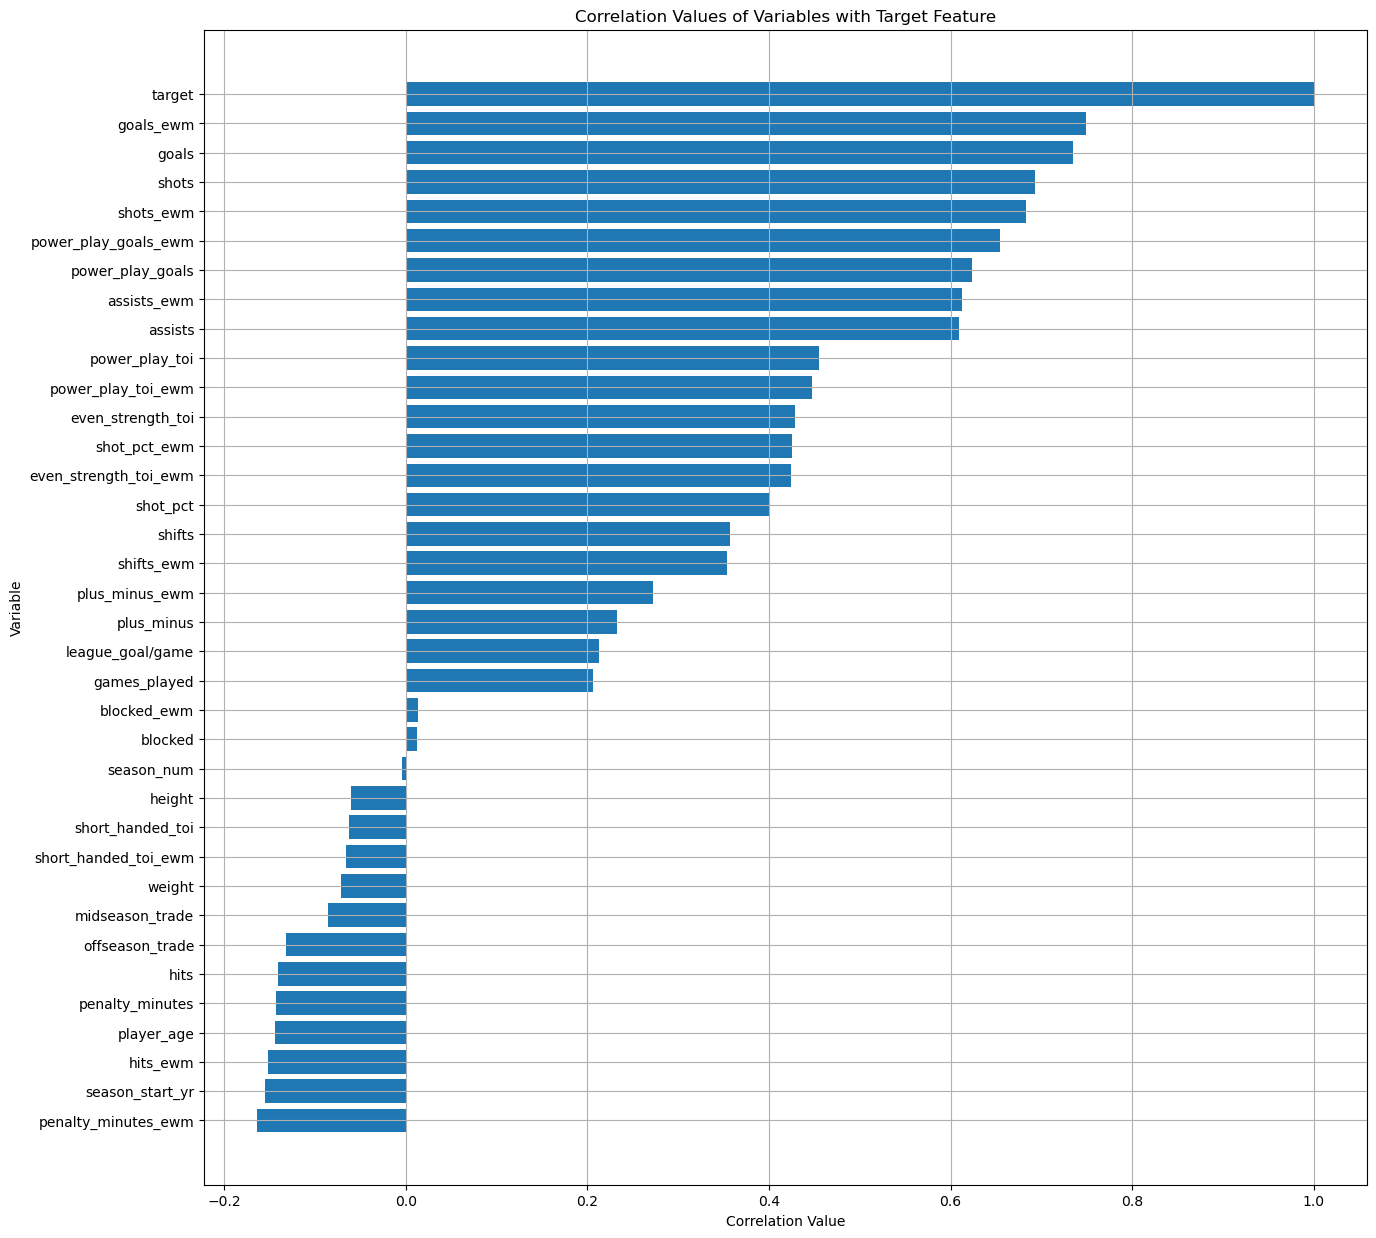

In [60]:
# plot correlation values to visualize

plt.figure(figsize=(15,15))

variables = list(target_corr['target'].sort_values().keys())
values = list(target_corr['target'].sort_values())

plt.barh(variables, values)
plt.xlabel("Correlation Value")
plt.ylabel("Variable")
plt.title("Correlation Values of Variables with Target Feature")
plt.grid()
plt.show()

### Testing for Colinearity
Create a heatmap to check for colinear relationships between independent variables in the dataset.  For any independent variables with a mutual correlation greater than 0.6, we need to drop 1 of them

In [61]:
# Get correlation coefficients for each pair of non-reference values.
stats_df = df.iloc[:, -35:]
corr_df = stats_df.corr(numeric_only=True)
corr_df 

,height,weight,season_start_yr,player_age,season_num,midseason_trade,offseason_trade,shot_pct,league_goal/game,games_played,goals,power_play_goals,shots,shifts,assists,plus_minus,penalty_minutes,hits,blocked,even_strength_toi,power_play_toi,short_handed_toi,goals_ewm,power_play_goals_ewm,shots_ewm,shifts_ewm,assists_ewm,plus_minus_ewm,penalty_minutes_ewm,hits_ewm,blocked_ewm,even_strength_toi_ewm,power_play_toi_ewm,short_handed_toi_ewm,shot_pct_ewm
height,1.000000,0.724241,0.184100,-0.043485,0.038237,-0.011328,-0.001400,-0.094747,-0.191462,-0.020410,-0.076408,-0.032248,-0.061179,-0.083872,-0.122013,-0.006439,0.127769,0.134979,0.003098,-0.069644,-0.052298,-0.053892,-0.092106,-0.043095,-0.070473,-0.092026,-0.135313,-0.018459,0.137224,0.139529,-0.001604,-0.075663,-0.055040,-0.062499,-0.134495
weight,0.724241,1.000000,0.163956,-0.010261,0.083373,0.000068,0.015139,-0.132750,-0.245531,-0.025934,-0.088520,-0.019192,-0.059473,-0.171291,-0.163324,-0.017261,0.259708,0.239510,-0.072700,-0.134402,-0.061165,-0.117977,-0.104517,-0.030937,-0.070226,-0.182799,-0.180055,-0.033644,0.277745,0.254438,-0.084189,-0.141906,-0.066481,-0.128019,-0.163597
season_start_yr,0.184100,0.163956,1.000000,0.139290,0.205968,-0.030659,0.037160,-0.286140,-0.721447,-0.020681,-0.176511,-0.134745,0.015191,0.060458,-0.160703,-0.002106,-0.296016,0.070164,0.310789,0.114478,-0.066920,-0.072517,-0.206215,-0.153105,0.013386,0.041877,-0.183111,-0.001787,-0.293887,0.065051,0.309201,0.095233,-0.071404,-0.099029,-0.406501
player_age,-0.043485,-0.010261,0.139290,1.000000,0.831251,0.073659,0.216035,-0.050038,-0.175957,0.131073,-0.024821,0.038085,0.019622,0.121235,0.050198,0.021269,-0.043120,-0.043252,0.019409,0.047491,0.088349,0.155939,0.046862,0.097804,0.102080,0.187507,0.120066,0.073012,-0.020393,-0.024329,0.018569,0.110138,0.136233,0.207261,0.033480
season_num,0.038237,0.083373,0.205968,0.831251,1.000000,0.053479,0.180544,-0.019145,-0.223053,0.162675,0.094391,0.157572,0.171994,0.239419,0.170731,0.030390,-0.040998,-0.074037,-0.001757,0.211833,0.238532,0.103697,0.169757,0.228002,0.254280,0.314265,0.243599,0.074722,-0.017230,-0.057384,0.004053,0.285681,0.294033,0.152494,0.083942
midseason_trade,-0.011328,0.000068,-0.030659,0.073659,0.053479,1.000000,0.213877,-0.083160,-0.014103,-0.026973,-0.111566,-0.065945,-0.088909,-0.084577,-0.092064,-0.129737,0.023949,-0.012204,-0.067905,-0.083752,-0.043861,-0.023115,-0.079556,-0.049331,-0.062191,-0.062646,-0.071121,-0.116777,0.032562,-0.009832,-0.060993,-0.065374,-0.032710,-0.007941,-0.025714
offseason_trade,-0.001400,0.015139,0.037160,0.216035,0.180544,0.213877,1.000000,-0.052630,-0.061312,-0.010614,-0.109988,-0.072972,-0.110781,-0.087790,-0.107896,-0.080728,0.008783,-0.024672,-0.039096,-0.101329,-0.059467,-0.010967,-0.108884,-0.070576,-0.090967,-0.072407,-0.100458,-0.107339,0.015456,-0.021893,-0.046501,-0.086966,-0.048708,-0.000484,-0.051157
shot_pct,-0.094747,-0.132750,-0.286140,-0.050038,-0.019145,-0.083160,-0.052630,1.000000,0.342265,0.159519,0.690584,0.498029,0.239118,0.230658,0.409525,0.307144,-0.024039,-0.109099,-0.000454,0.261384,0.291177,-0.022101,0.602482,0.459759,0.228603,0.225885,0.404052,0.295372,-0.035447,-0.112252,0.004615,0.256517,0.273715,-0.017208,0.760371
league_goal/game,-0.191462,-0.245531,-0.721447,-0.175957,-0.223053,-0.014103,-0.061312,0.342265,1.000000,0.012309,0.244032,0.148047,0.040796,0.013349,0.214858,-0.001487,0.212910,0.002782,0.128401,0.019641,0.004742,-0.007196,0.264689,0.156954,0.040776,0.042098,0.226971,0.002198,0.200145,-0.005295,0.131390,0.044243,0.008367,0.013455,0.418146
games_played,-0.020410,-0.025934,-0.020681,0.131073,0.162675,-0.026973,-0.010614,0.159519,0.012309,1.000000,0.291478,0.232581,0.312586,0.295398,0.290607,0.114560,-0.073715,-0.063079,0.023636,0.259287,0.219276,0.154462,0.280739,0.232121,0.292499,0.277311,0.278409,0.130885,-0.080369,-0.065525,0.004671,0.241082,0.217066,0.146817,0.159206


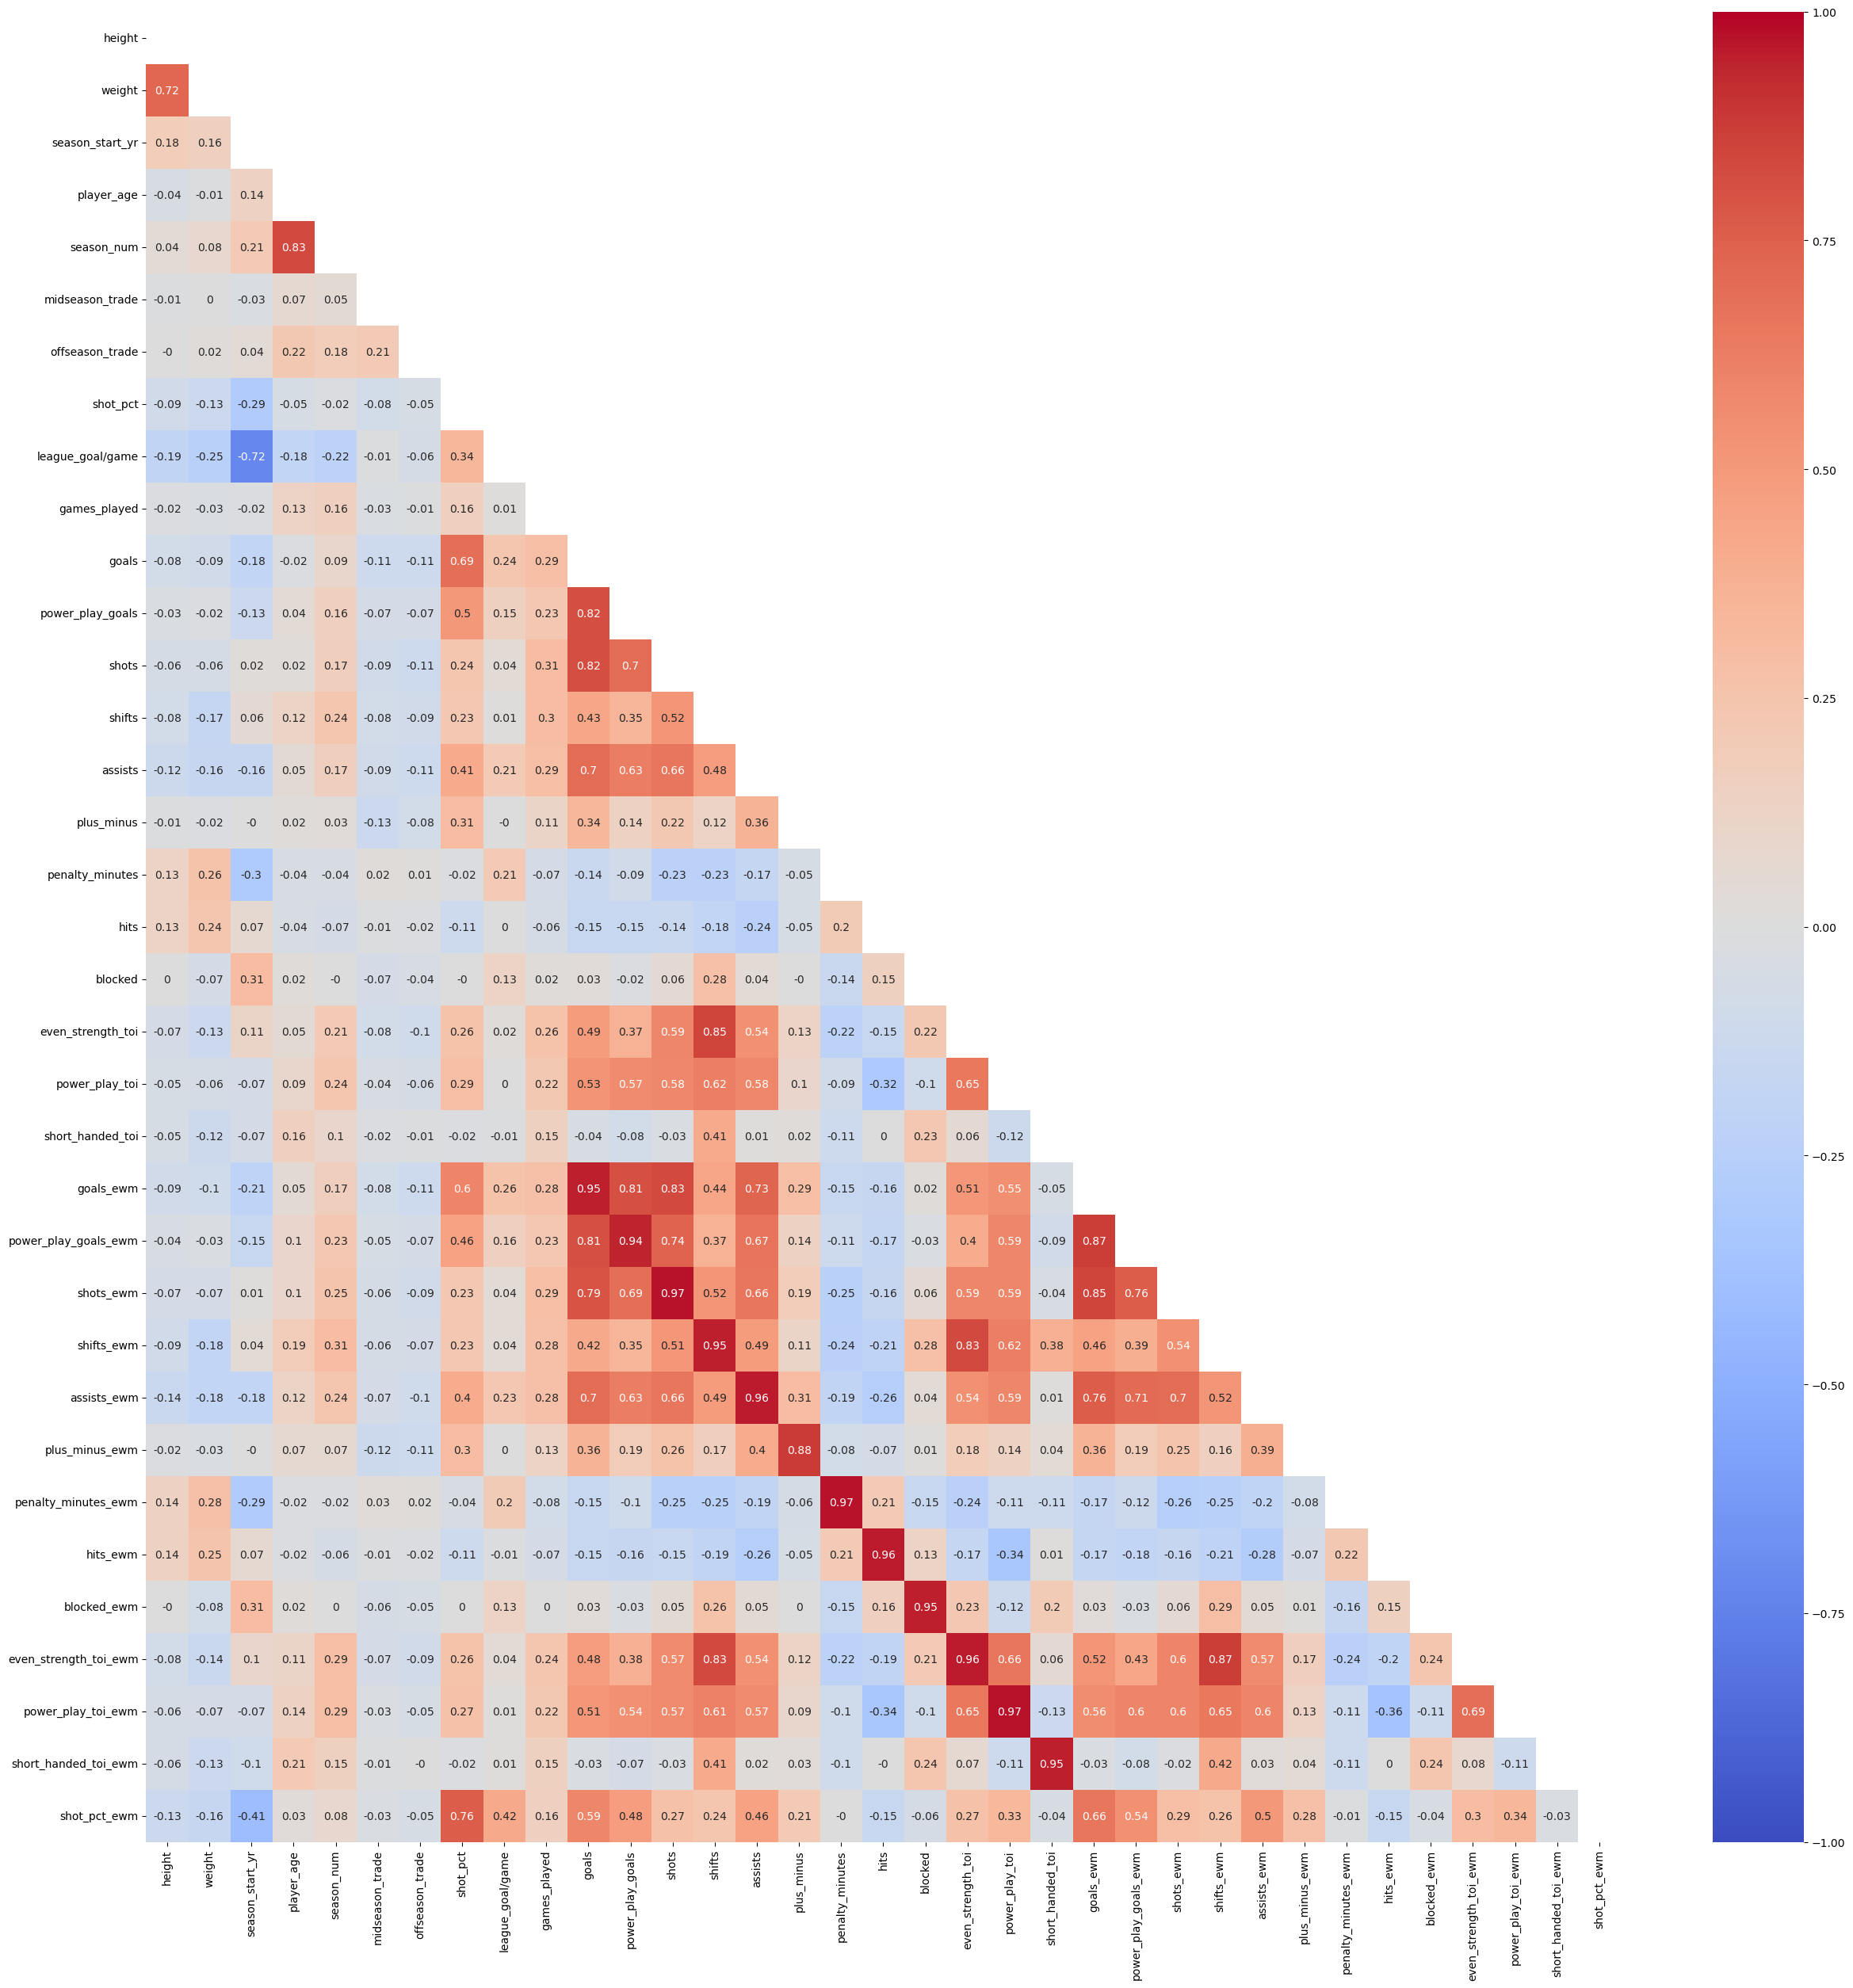

In [62]:
# Create a heatmap of the correlation coefficients
# Mask one side of the symmetrical heatmap
mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

There are many pairs of collinear variables, which is not super surprising, since the ewm averages would be expected to be similar to the single season value.  For each r-value pair >0.7, we will drop the variable that is less strongly correlated with the target variable.

Let's check again using VIF

In [63]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF assumes the presence of a constant in X
X = stats_df
X = sm.add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)[1:].sort_values()

midseason_trade           1.082067
offseason_trade           1.133283
games_played              1.205222
height                    2.190172
weight                    2.603528
league_goal/game          3.762418
player_age                3.848357
season_start_yr           4.414039
season_num                4.499652
plus_minus                6.249634
plus_minus_ewm            6.328700
shot_pct_ewm              7.281132
shot_pct                  8.776600
blocked                  13.165855
blocked_ewm              13.738800
hits                     15.348312
hits_ewm                 15.709718
power_play_goals         16.677793
short_handed_toi         19.442218
assists                  20.165437
penalty_minutes          20.634035
penalty_minutes_ewm      21.369466
short_handed_toi_ewm     21.767336
assists_ewm              23.477514
power_play_goals_ewm     24.169085
power_play_toi           24.917624
power_play_toi_ewm       29.634392
even_strength_toi        47.815611
shots               

Start by removing the following:

In [64]:
stats_df.drop(columns=['goals', 'power_play_goals', 'assists', 'shots_ewm', 'power_play_toi_ewm', \
                      'even_strength_toi_ewm', 'shifts_ewm', 'blocked', 'hits', \
                      'short_handed_toi', 'plus_minus', 'penalty_minutes'], inplace=True)

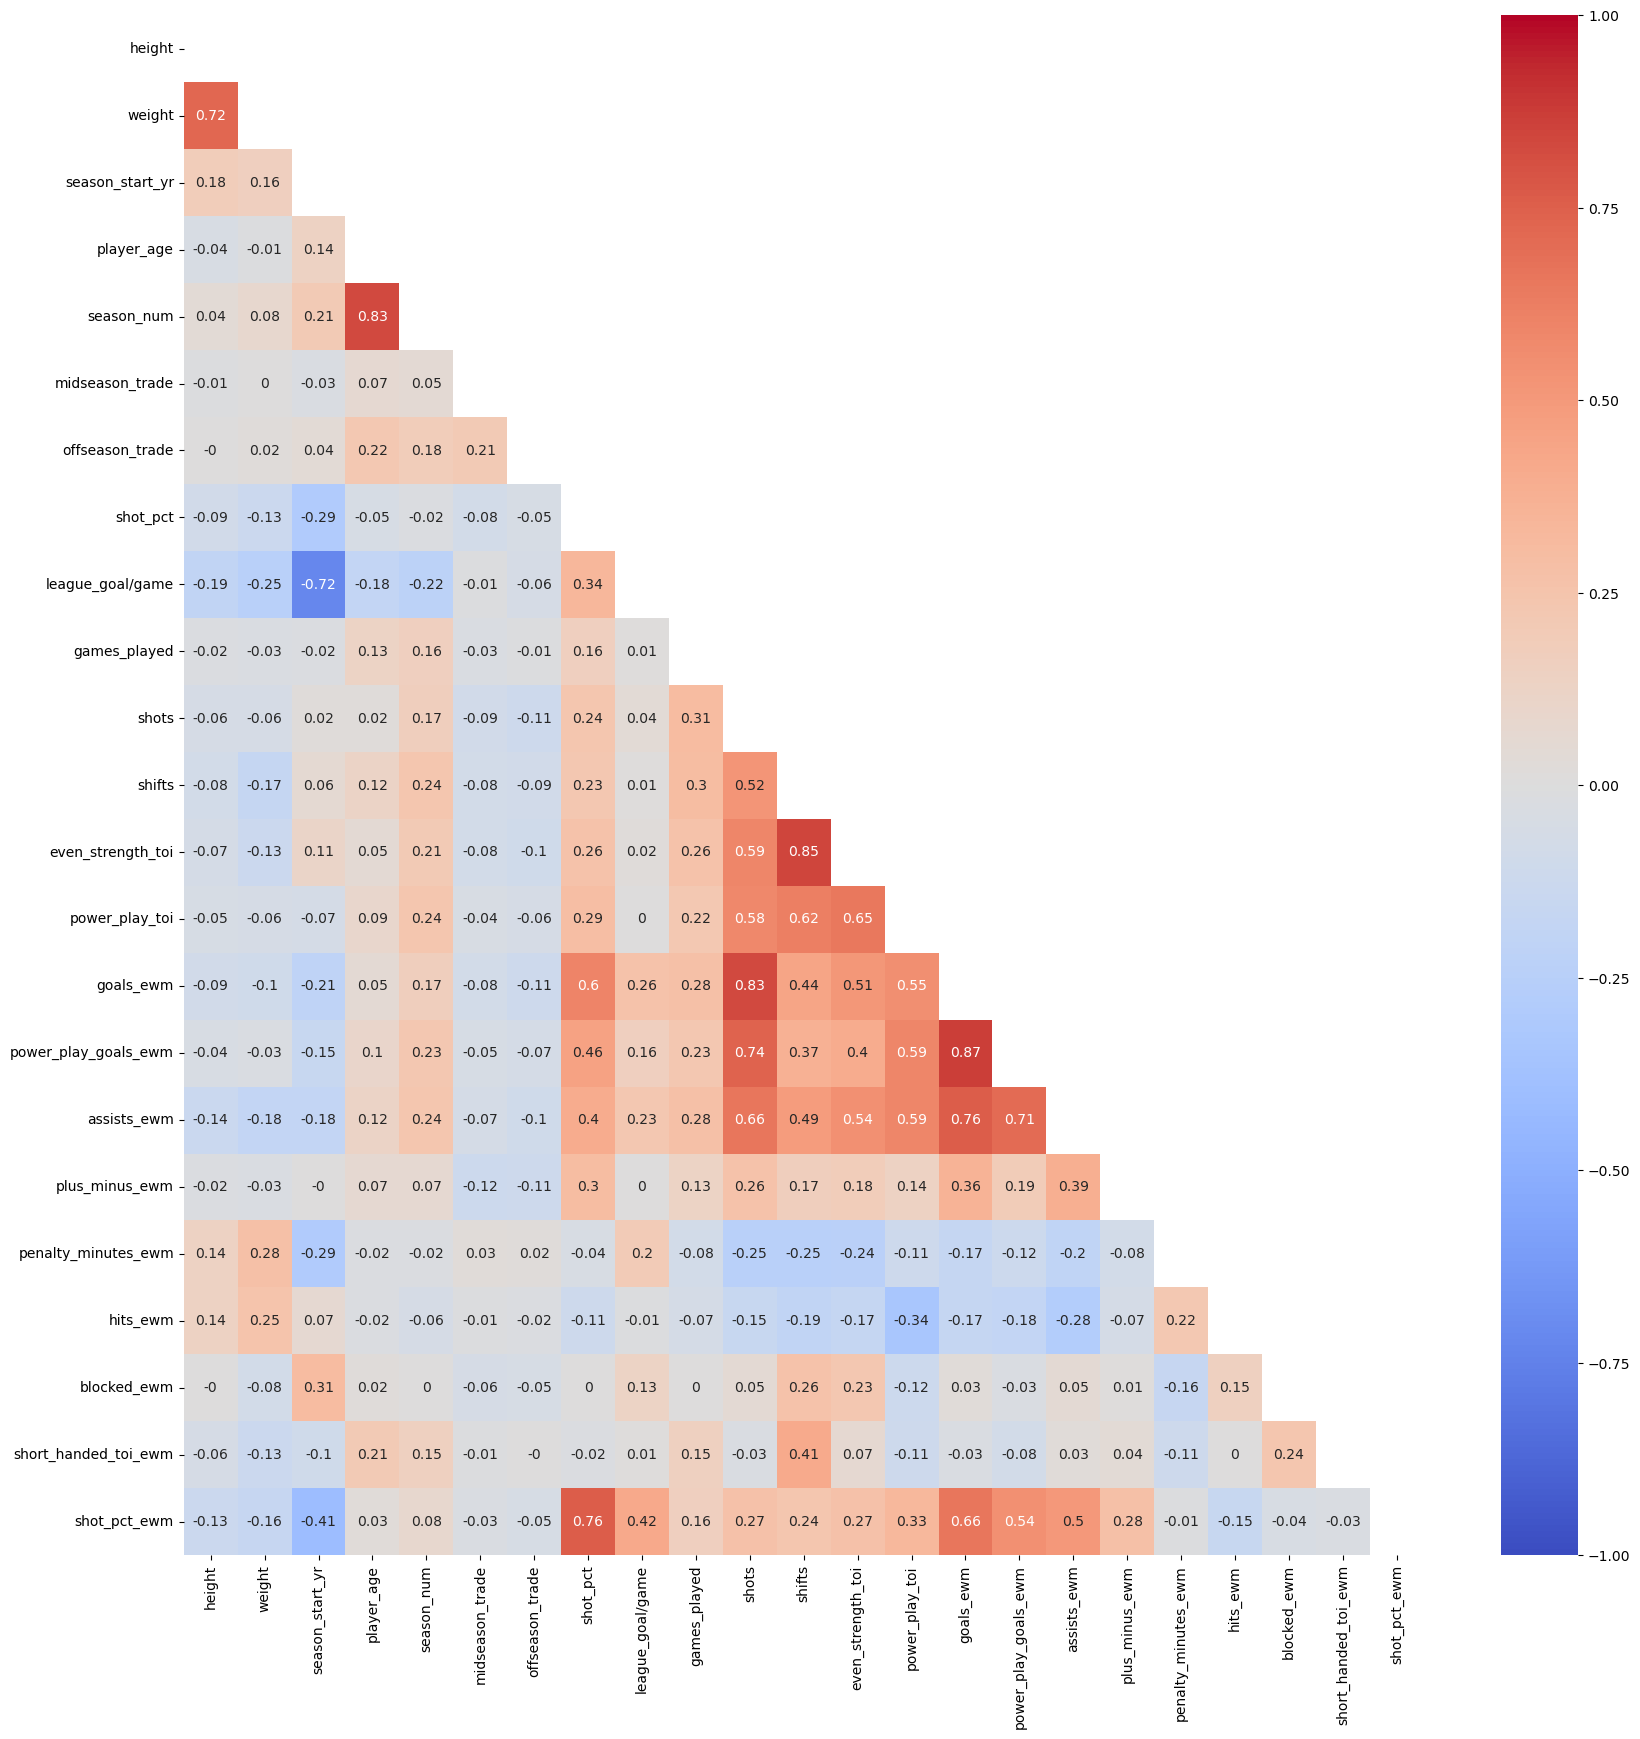

In [65]:
# run the heatmap again
corr_df2 = stats_df.corr(numeric_only=True)

mask = np.triu(corr_df2)

plt.figure(figsize=(20, 20))
sns.heatmap(corr_df2.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [66]:
# Recalculate correlation values to decided what to drop
full_df2 = df[['target']]
full_df2 = full_df2.join(stats_df)
target_corr = full_df2.corr()
target_corr['target'].sort_values()

penalty_minutes_ewm    -0.164202
season_start_yr        -0.155209
hits_ewm               -0.151743
player_age             -0.144778
offseason_trade        -0.132418
midseason_trade        -0.085410
weight                 -0.071893
short_handed_toi_ewm   -0.065485
height                 -0.060519
season_num             -0.004242
blocked_ewm             0.012933
games_played            0.206332
league_goal/game        0.212778
plus_minus_ewm          0.272383
shifts                  0.356855
shot_pct                0.399909
shot_pct_ewm            0.425668
even_strength_toi       0.429063
power_play_toi          0.455016
assists_ewm             0.612702
power_play_goals_ewm    0.654920
shots                   0.693362
goals_ewm               0.749507
target                  1.000000
Name: target, dtype: float64

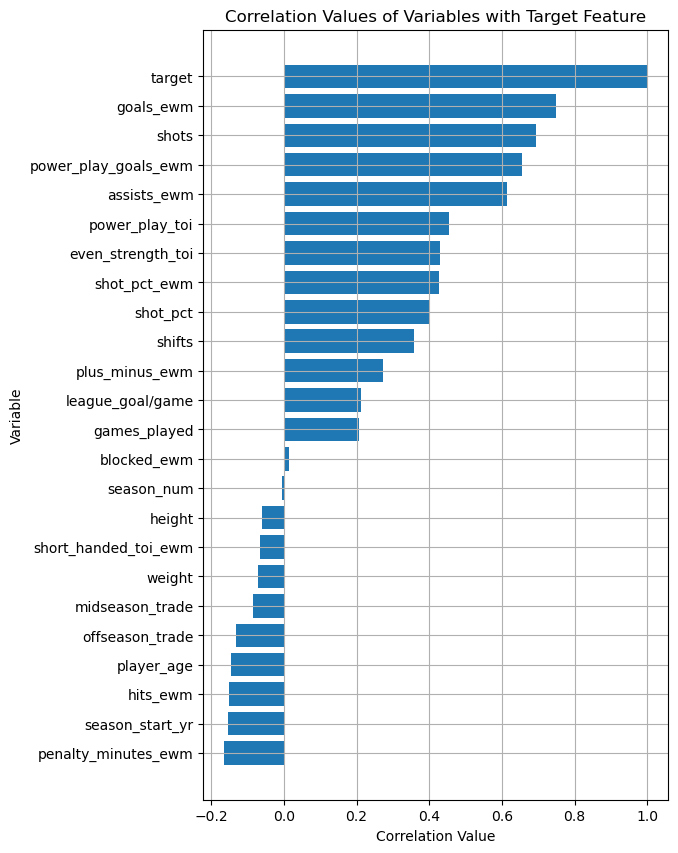

In [67]:
plt.figure(figsize=(6,10))

variables = list(target_corr['target'].sort_values().keys())
values = list(target_corr['target'].sort_values())

plt.barh(variables, values)
plt.xlabel("Correlation Value")
plt.ylabel("Variable")
plt.title("Correlation Values of Variables with Target Feature")
plt.grid()
plt.show()

Remove the following:

In [68]:
stats_df.drop(columns=['power_play_goals_ewm', 'season_num', 'shifts', \
                      'shots'], inplace=True)

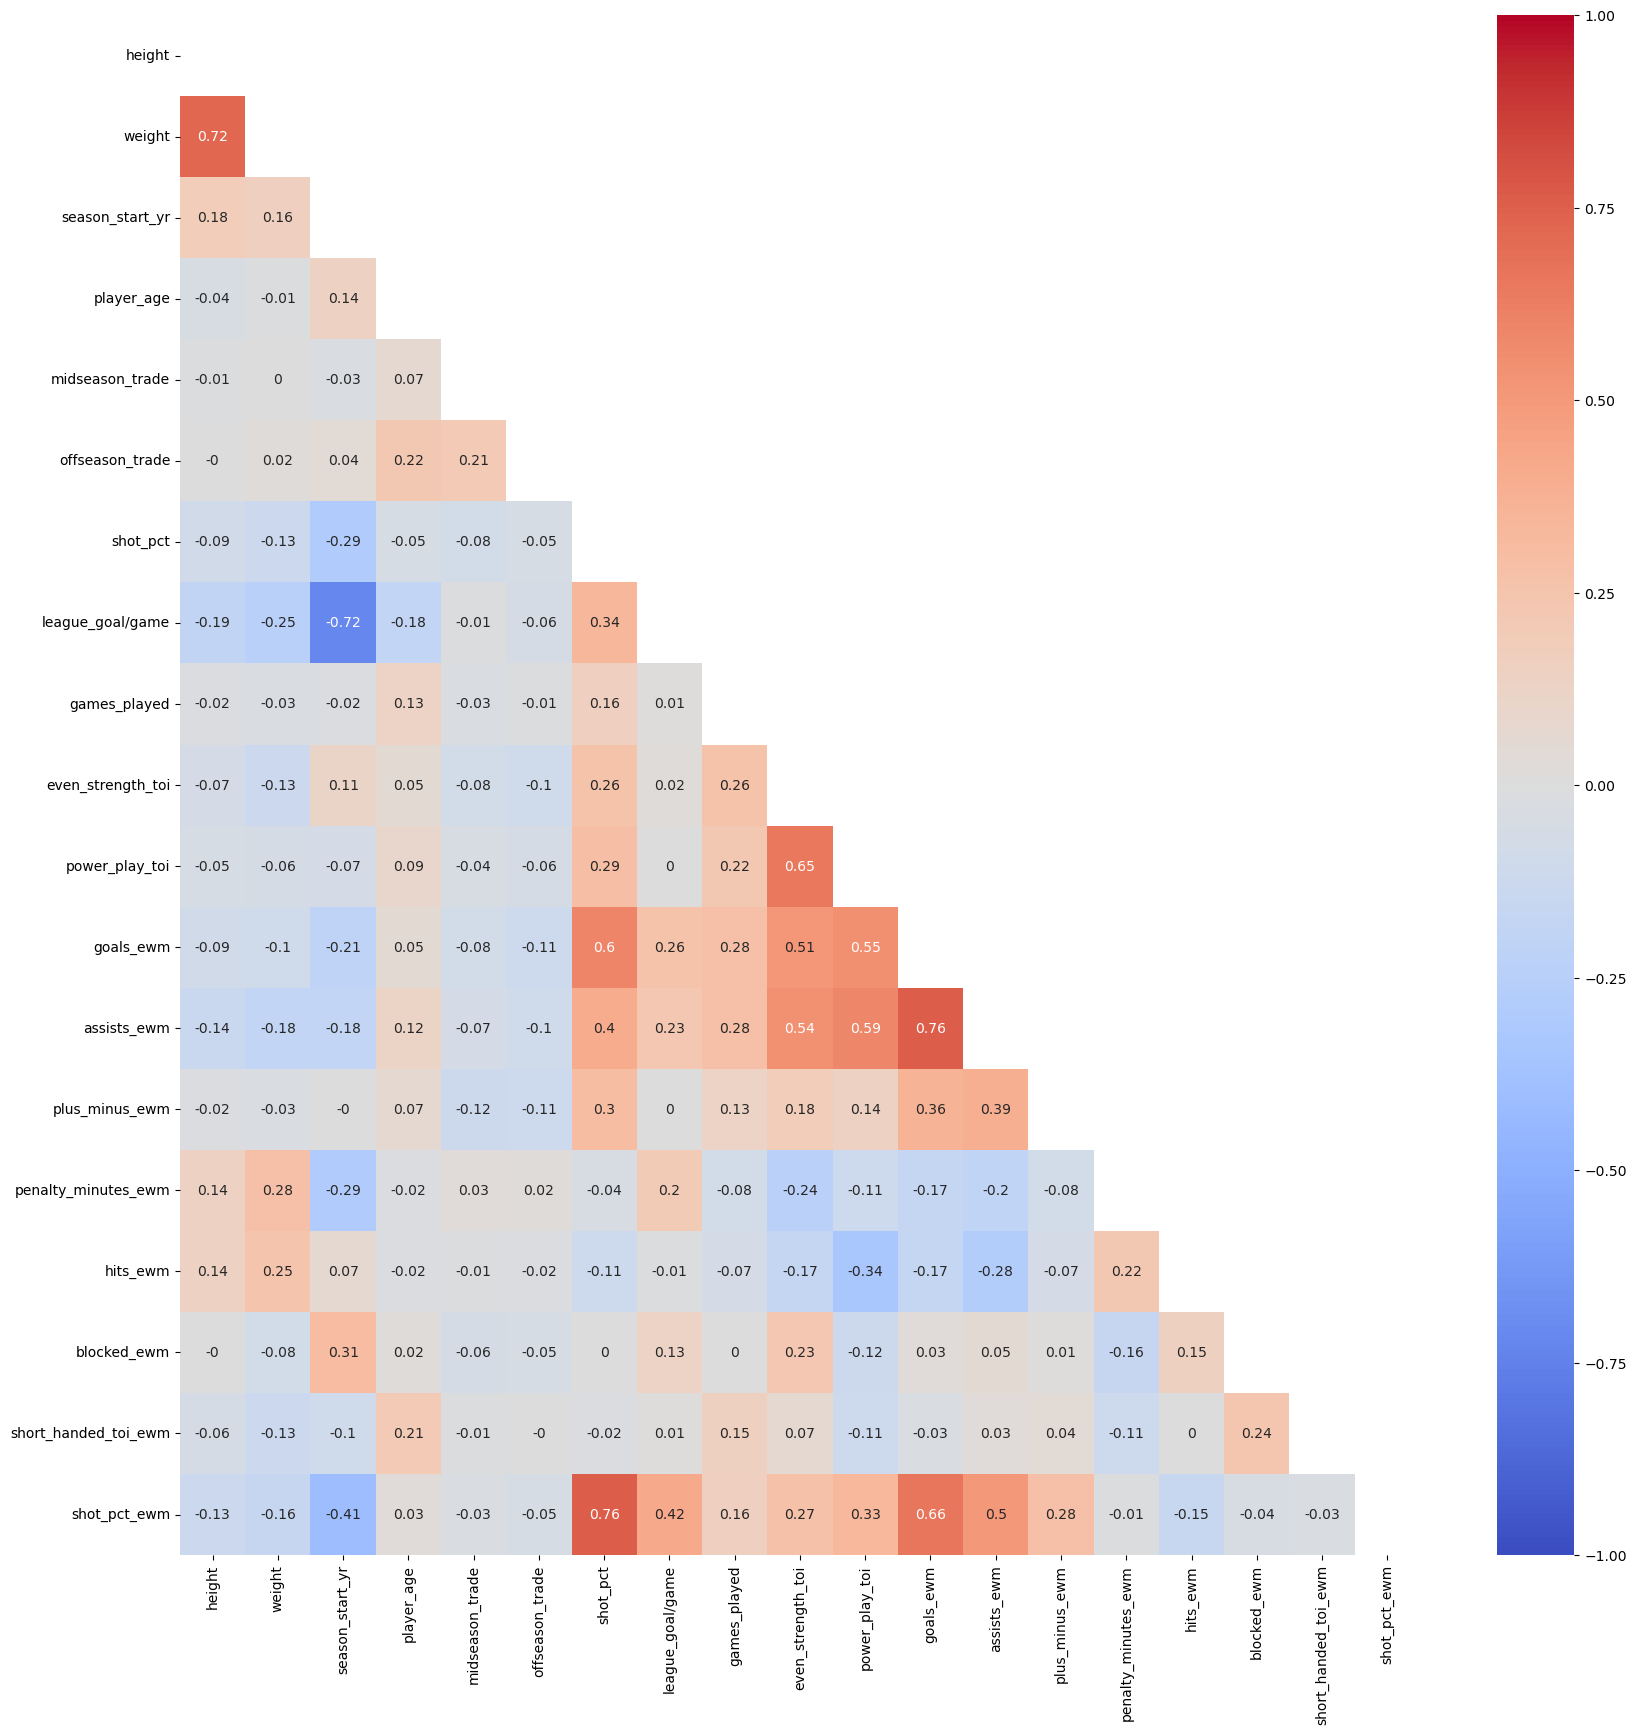

In [69]:
# run the heatmap again
corr_df3 = stats_df.corr(numeric_only=True)

mask = np.triu(corr_df3)

plt.figure(figsize=(20, 20))
sns.heatmap(corr_df3.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

The last two columns that will be dropped for now are `assists_ewm` and `shot_pct`, as they are the last two features with r-values above 0.75.  A more standard r-value cutoff is 0.5 or 0.6; however, we have previously seen that the model is not very sensitive to overfitting, so we will risk including some features with higher r-values to try and bump up the models scoring metrics and prediction accuracy.  

In [70]:
stats_df.drop(columns=['assists_ewm', 'shot_pct'], inplace=True)

In [71]:
# Rerun VIF
X = stats_df
X = sm.add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)[1:].sort_values()

midseason_trade         1.066505
offseason_trade         1.121198
games_played            1.152756
plus_minus_ewm          1.207966
player_age              1.209499
hits_ewm                1.282828
short_handed_toi_ewm    1.391496
penalty_minutes_ewm     1.405984
blocked_ewm             1.967735
shot_pct_ewm            2.147192
height                  2.176592
even_strength_toi       2.366211
power_play_toi          2.520900
weight                  2.542100
goals_ewm               2.754207
league_goal/game        3.499645
season_start_yr         4.014710
dtype: float64

#### Visualize Correlation Values
Visualize the r-values of the remaining independent features

In [72]:
# Recalculate correlation values
full_df2 = df[['target']]
full_df2 = full_df2.join(stats_df)
target_corr = full_df2.corr()
target_corr['target'].sort_values()

penalty_minutes_ewm    -0.164202
season_start_yr        -0.155209
hits_ewm               -0.151743
player_age             -0.144778
offseason_trade        -0.132418
midseason_trade        -0.085410
weight                 -0.071893
short_handed_toi_ewm   -0.065485
height                 -0.060519
blocked_ewm             0.012933
games_played            0.206332
league_goal/game        0.212778
plus_minus_ewm          0.272383
shot_pct_ewm            0.425668
even_strength_toi       0.429063
power_play_toi          0.455016
goals_ewm               0.749507
target                  1.000000
Name: target, dtype: float64

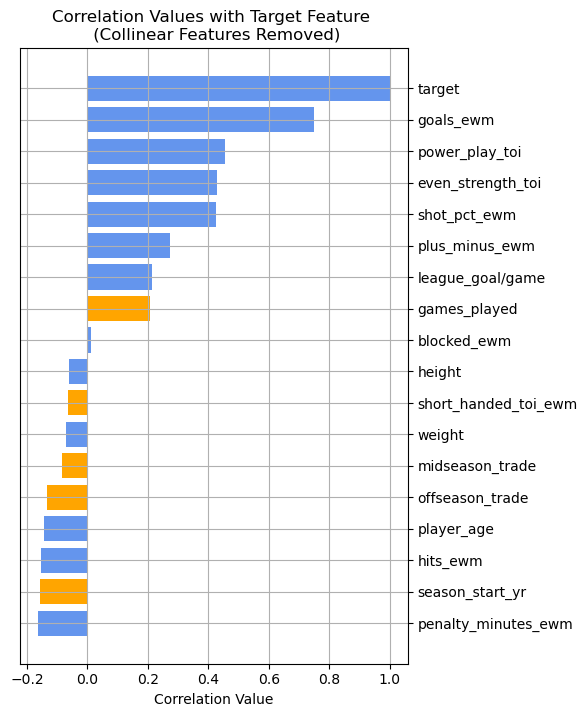

In [73]:
# plot r-values

plt.figure(figsize=(5,8))

variables = list(target_corr['target'].sort_values().keys())
values = list(target_corr['target'].sort_values())

# Define colors for each bar - colors were assigned for part of a presentation
colors = ['cornflowerblue', 'orange', 'cornflowerblue', 'cornflowerblue', 'orange', 'orange', \
         'cornflowerblue', 'orange', 'cornflowerblue', 'cornflowerblue', 'orange', 'cornflowerblue', \
         'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue']  

plt.barh(variables, values, color=colors)
plt.xlabel("Correlation Value")
# plt.ylabel("Variable")
plt.title("Correlation Values with Target Feature \n (Collinear Features Removed)")
plt.grid()

plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")

plt.show()

### Variable Selection

In [74]:
# X already defined when we ran VIF above
y = df['target']

In [75]:
# fit linear model, review P-values
my_linreg1=linear_model.OLS(y,X).fit()
my_linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1242.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:55:51   Log-Likelihood:                -46084.
No. Observations:               13503   AIC:                         9.220e+04
Df Residuals:                   13485   BIC:                         9.234e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.3948     21.399      0.252      0.801     -36.551      47.340
height                  -0.0788      0.046     -1.708      0.088      -0.169       0.012
weight                   0.0215      0.007      3.259      0.001       0.009       0.034
season_start_yr          0.0047      0.010      0.446      0.656      -0.016       0.025
player_age              -0.4997      0.017    -29.793      0.000      -0.533      -0.467
midseason_trade         -0.1757      0.214     -0.819      0.413      -0.596       0.245
offseason_trade         -0.1475      0.168     -0.879      0.379      -0.476       0.181
league_goal/game         1.4263      0.275      5.189      0.000       0.888       1.965
games_played             0.0048      0.004      1.180      0.238      -0.003       0.013
even_strength_toi        0.0029      0.001      4.643      0.000       0.002       0.004
power_play_toi           0.0065      0.001      6.156      0.000       0.004       0.009
goals_ewm                0.8448      0.010     85.616      0.000       0.825       0.864
plus_minus_ewm           0.0281      0.006      4.858      0.000       0.017       0.039
penalty_minutes_ewm     -0.0073      0.001     -6.366      0.000      -0.010      -0.005
hits_ewm                -0.0032      0.002     -1.962      0.050      -0.006   -2.53e-06
blocked_ewm             -0.0193      0.006     -3.364      0.001      -0.031      -0.008
short_handed_toi_ewm    -0.0005      0.001     -0.373      0.709      -0.003       0.002
shot_pct_ewm           -41.2773      2.474    -16.686      0.000     -46.126     -36.428
==============================================================================
Omnibus:                     1000.242   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1709.767
Skew:                           0.557   Prob(JB):                         0.00
Kurtosis:                       4.340   Cond. No.                     7.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`short_handed_toi_ewm` has the highest P-value - drop it.

In [76]:
# drop 'midseason_trades'
X.drop(columns=['short_handed_toi_ewm'], inplace=True)

# fit model again
my_linreg=linear_model.OLS(y,X).fit()
my_linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1320.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:55:51   Log-Likelihood:                -46084.
No. Observations:               13503   AIC:                         9.220e+04
Df Residuals:                   13486   BIC:                         9.233e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3373     19.769      0.118      0.906     -36.412      41.087
height                 -0.0798      0.046     -1.732      0.083      -0.170       0.011
weight                  0.0217      0.007      3.300      0.001       0.009       0.035
season_start_yr         0.0062      0.010      0.642      0.521      -0.013       0.025
player_age             -0.5012      0.016    -30.771      0.000      -0.533      -0.469
midseason_trade        -0.1746      0.214     -0.814      0.415      -0.595       0.246
offseason_trade        -0.1455      0.168     -0.867      0.386      -0.474       0.183
league_goal/game        1.4538      0.265      5.489      0.000       0.935       1.973
games_played            0.0045      0.004      1.138      0.255      -0.003       0.012
even_strength_toi       0.0028      0.001      4.634      0.000       0.002       0.004
power_play_toi          0.0066      0.001      6.311      0.000       0.005       0.009
goals_ewm               0.8449      0.010     85.730      0.000       0.826       0.864
plus_minus_ewm          0.0280      0.006      4.848      0.000       0.017       0.039
penalty_minutes_ewm    -0.0073      0.001     -6.362      0.000      -0.010      -0.005
hits_ewm               -0.0031      0.002     -1.951      0.051      -0.006    1.48e-05
blocked_ewm            -0.0200      0.005     -3.706      0.000      -0.031      -0.009
shot_pct_ewm          -41.2192      2.469    -16.696      0.000     -46.059     -36.380
==============================================================================
Omnibus:                     1000.527   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1709.635
Skew:                           0.558   Prob(JB):                         0.00
Kurtosis:                       4.340   Cond. No.                     7.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are still multiple features with P-values above the rule-of-thumb threshold of 0.05.  `season_start_yr` is the highest of the remaining values - drop it next.

In [77]:
# drop 'short_handed_toi'
X.drop(columns=['season_start_yr'], inplace=True)

# fit model again
my_linreg=linear_model.OLS(y,X).fit()
my_linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1408.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:55:52   Log-Likelihood:                -46085.
No. Observations:               13503   AIC:                         9.220e+04
Df Residuals:                   13487   BIC:                         9.232e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.8913      2.820      5.282      0.000       9.365      20.418
height                 -0.0778      0.046     -1.693      0.091      -0.168       0.012
weight                  0.0217      0.007      3.300      0.001       0.009       0.035
player_age             -0.5009      0.016    -30.765      0.000      -0.533      -0.469
midseason_trade        -0.1784      0.214     -0.833      0.405      -0.598       0.242
offseason_trade        -0.1426      0.168     -0.851      0.395      -0.471       0.186
league_goal/game        1.3325      0.185      7.185      0.000       0.969       1.696
games_played            0.0044      0.004      1.115      0.265      -0.003       0.012
even_strength_toi       0.0029      0.001      4.733      0.000       0.002       0.004
power_play_toi          0.0065      0.001      6.281      0.000       0.004       0.009
goals_ewm               0.8451      0.010     85.777      0.000       0.826       0.864
plus_minus_ewm          0.0281      0.006      4.855      0.000       0.017       0.039
penalty_minutes_ewm    -0.0074      0.001     -6.515      0.000      -0.010      -0.005
hits_ewm               -0.0031      0.002     -1.947      0.052      -0.006    2.11e-05
blocked_ewm            -0.0183      0.005     -3.893      0.000      -0.028      -0.009
shot_pct_ewm          -41.4419      2.444    -16.955      0.000     -46.233     -36.651
==============================================================================
Omnibus:                      998.613   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1704.668
Skew:                           0.557   Prob(JB):                         0.00
Kurtosis:                       4.337   Cond. No.                     4.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Drop `midseason_trade`

In [78]:
# drop 'short_handed_toi'
X.drop(columns=['midseason_trade'], inplace=True)

# fit model again
my_linreg=linear_model.OLS(y,X).fit()
my_linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1508.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:55:52   Log-Likelihood:                -46085.
No. Observations:               13503   AIC:                         9.220e+04
Df Residuals:                   13488   BIC:                         9.231e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.8609      2.819      5.271      0.000       9.335      20.387
height                 -0.0776      0.046     -1.688      0.091      -0.168       0.012
weight                  0.0217      0.007      3.302      0.001       0.009       0.035
player_age             -0.5015      0.016    -30.827      0.000      -0.533      -0.470
offseason_trade        -0.1681      0.165     -1.020      0.308      -0.491       0.155
league_goal/game        1.3324      0.185      7.184      0.000       0.969       1.696
games_played            0.0045      0.004      1.120      0.263      -0.003       0.012
even_strength_toi       0.0029      0.001      4.752      0.000       0.002       0.004
power_play_toi          0.0065      0.001      6.284      0.000       0.004       0.009
goals_ewm               0.8453      0.010     85.812      0.000       0.826       0.865
plus_minus_ewm          0.0285      0.006      4.944      0.000       0.017       0.040
penalty_minutes_ewm    -0.0074      0.001     -6.521      0.000      -0.010      -0.005
hits_ewm               -0.0031      0.002     -1.938      0.053      -0.006    3.58e-05
blocked_ewm            -0.0182      0.005     -3.865      0.000      -0.027      -0.009
shot_pct_ewm          -41.4915      2.444    -16.980      0.000     -46.281     -36.702
==============================================================================
Omnibus:                      997.520   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1703.374
Skew:                           0.556   Prob(JB):                         0.00
Kurtosis:                       4.337   Cond. No.                     4.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Drop `offseason_trade`

In [79]:
# drop 'short_handed_toi'
X.drop(columns=['offseason_trade'], inplace=True)

# fit model again
my_linreg=linear_model.OLS(y,X).fit()
my_linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1624.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:55:52   Log-Likelihood:                -46085.
No. Observations:               13503   AIC:                         9.220e+04
Df Residuals:                   13489   BIC:                         9.230e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.8827      2.819      5.279      0.000       9.357      20.409
height                 -0.0773      0.046     -1.682      0.093      -0.167       0.013
weight                  0.0216      0.007      3.288      0.001       0.009       0.035
player_age             -0.5052      0.016    -31.847      0.000      -0.536      -0.474
league_goal/game        1.3331      0.185      7.188      0.000       0.970       1.697
games_played            0.0045      0.004      1.117      0.264      -0.003       0.012
even_strength_toi       0.0029      0.001      4.795      0.000       0.002       0.004
power_play_toi          0.0065      0.001      6.296      0.000       0.005       0.009
goals_ewm               0.8458      0.010     85.963      0.000       0.826       0.865
plus_minus_ewm          0.0290      0.006      5.060      0.000       0.018       0.040
penalty_minutes_ewm    -0.0074      0.001     -6.509      0.000      -0.010      -0.005
hits_ewm               -0.0030      0.002     -1.899      0.058      -0.006    9.84e-05
blocked_ewm            -0.0180      0.005     -3.841      0.000      -0.027      -0.009
shot_pct_ewm          -41.5574      2.443    -17.013      0.000     -46.345     -36.769
==============================================================================
Omnibus:                      997.475   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1702.964
Skew:                           0.557   Prob(JB):                         0.00
Kurtosis:                       4.337   Cond. No.                     4.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Drop `games_played`

In [80]:
# drop 'short_handed_toi'
X.drop(columns=['games_played'], inplace=True)

# fit model again
my_linreg=linear_model.OLS(y,X).fit()
my_linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1759.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:55:52   Log-Likelihood:                -46086.
No. Observations:               13503   AIC:                         9.220e+04
Df Residuals:                   13490   BIC:                         9.230e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.0000      2.817      5.324      0.000       9.478      20.522
height                 -0.0771      0.046     -1.678      0.093      -0.167       0.013
weight                  0.0217      0.007      3.296      0.001       0.009       0.035
player_age             -0.5031      0.016    -31.935      0.000      -0.534      -0.472
league_goal/game        1.3331      0.185      7.188      0.000       0.970       1.697
even_strength_toi       0.0030      0.001      4.966      0.000       0.002       0.004
power_play_toi          0.0065      0.001      6.284      0.000       0.004       0.009
goals_ewm               0.8472      0.010     86.892      0.000       0.828       0.866
plus_minus_ewm          0.0292      0.006      5.093      0.000       0.018       0.040
penalty_minutes_ewm    -0.0074      0.001     -6.524      0.000      -0.010      -0.005
hits_ewm               -0.0030      0.002     -1.897      0.058      -0.006       0.000
blocked_ewm            -0.0183      0.005     -3.895      0.000      -0.027      -0.009
shot_pct_ewm          -41.6197      2.442    -17.043      0.000     -46.406     -36.833
==============================================================================
Omnibus:                      993.912   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1699.727
Skew:                           0.554   Prob(JB):                         0.00
Kurtosis:                       4.338   Cond. No.                     4.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The P-values for `height` and `hits_ewm` are higher than 0.05, but in the interest of not shrinking our feature space too much, we will accept P-values up to 0.1.

### Split the data into train and test splits
Use a standard 80/20 split

In [81]:
# Drop the constant that was assigned when VIF was ran
X.drop(columns=['const'], inplace=True)

# y is already assigned

In [82]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=975)

# Check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10802, 12) (2701, 12) (10802,) (2701,)


### A) Min-Max Scaled
We are unsure about the significance of outliers in our dataset, but suspect that keeping the relative scaling may be important.  Try both MinMaxScaler and StandardScaler.  Starting with MinMax:

In [83]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_train_mm = MM.fit_transform(X_train)
X_test_mm = MM.transform(X_test)

In [84]:
print(X_train_mm.shape, X_test_mm.shape)

(10802, 12) (2701, 12)


#### Fit & score model


In [85]:
# instantiate linear regression model
linreg_mm = LinearRegression()

# fit the model
linreg_mm.fit(X_train_mm, y_train)

LinearRegression()

In [86]:
# get y predictions on test data
y_predictions_mm = linreg_mm.predict(X_test_mm)

# print scores and errors
print(f"Train score on scaled data: {linreg_mm.score(X_train_mm, y_train):.3f}")
print(f"Test score on scaled data: {linreg_mm.score(X_test_mm, y_test):.3f}")
print("")
print(f"R2 score for test data: {r2_score(y_test, y_predictions_mm):.3f}")
print(f"Mean Squared Error for test data: {mean_squared_error(y_test, y_predictions_mm):.3f}")
print(f"Mean Absolute Error for test data: {mean_absolute_error(y_test, y_predictions_mm):.3f}")

Train score on scaled data: 0.610
Test score on scaled data: 0.608

R2 score for test data: 0.608
Mean Squared Error for test data: 53.957
Mean Absolute Error for test data: 5.545


R2 is the primary scoring metric for linear regression models - it is a measure of how much of the total variance in our target variable, `goals`, was explained by the model.  A perfect model would have an R2 value of 1, but such a result would suggest strong multicollinearity (i.e., some combination of model features being able to perfectly predict the target variable).  Conversely, an R2 score of 0 means that the model is no better at predicting the target variable than simply guessing the mean. 

With that context in mind, an R2 score of 0.608 on the test data can be interpreted as follows:  the model explains 60.8% of the variation in the dependent variable.  The R2 score for the train data was only slightly higher, at 0.610 - the proximity of these values suggests the model was *not* overfit on the training data.

Mean Squared Error (MSE) is a measure of how close the models predictions are to the actual values:  R2 answers the question "How many times did the model get it right?", MSE answers the question "When the model was wrong, how far off was it (from the correct value)?".  MSE is based on the squared value of errors, so an MSE of 53.96 is fairly high, and suggests that when the model was incorrect, it missed by a fair margin.

#### Review feature coefficients

In [87]:
# put coefficients in a dataframe
coefficients_mm = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linreg_mm.coef_.flatten()  # Flatten in case it's a 2D array with a single column
})

# sort values in place, and reset index
coefficients_mm.sort_values(by='Coefficient', ascending=False, inplace=True, ignore_index=True)

In [88]:
# take a look
coefficients_mm

,Feature,Coefficient
0,goals_ewm,72.273343
1,power_play_toi,4.882905
2,plus_minus_ewm,4.835280
3,even_strength_toi,3.598193
4,weight,2.207775
5,league_goal/game,1.603018
6,height,-1.122420
7,hits_ewm,-1.379753
8,blocked_ewm,-1.831151
9,penalty_minutes_ewm,-4.575644


Visualize the coefficient values on a bar chart:

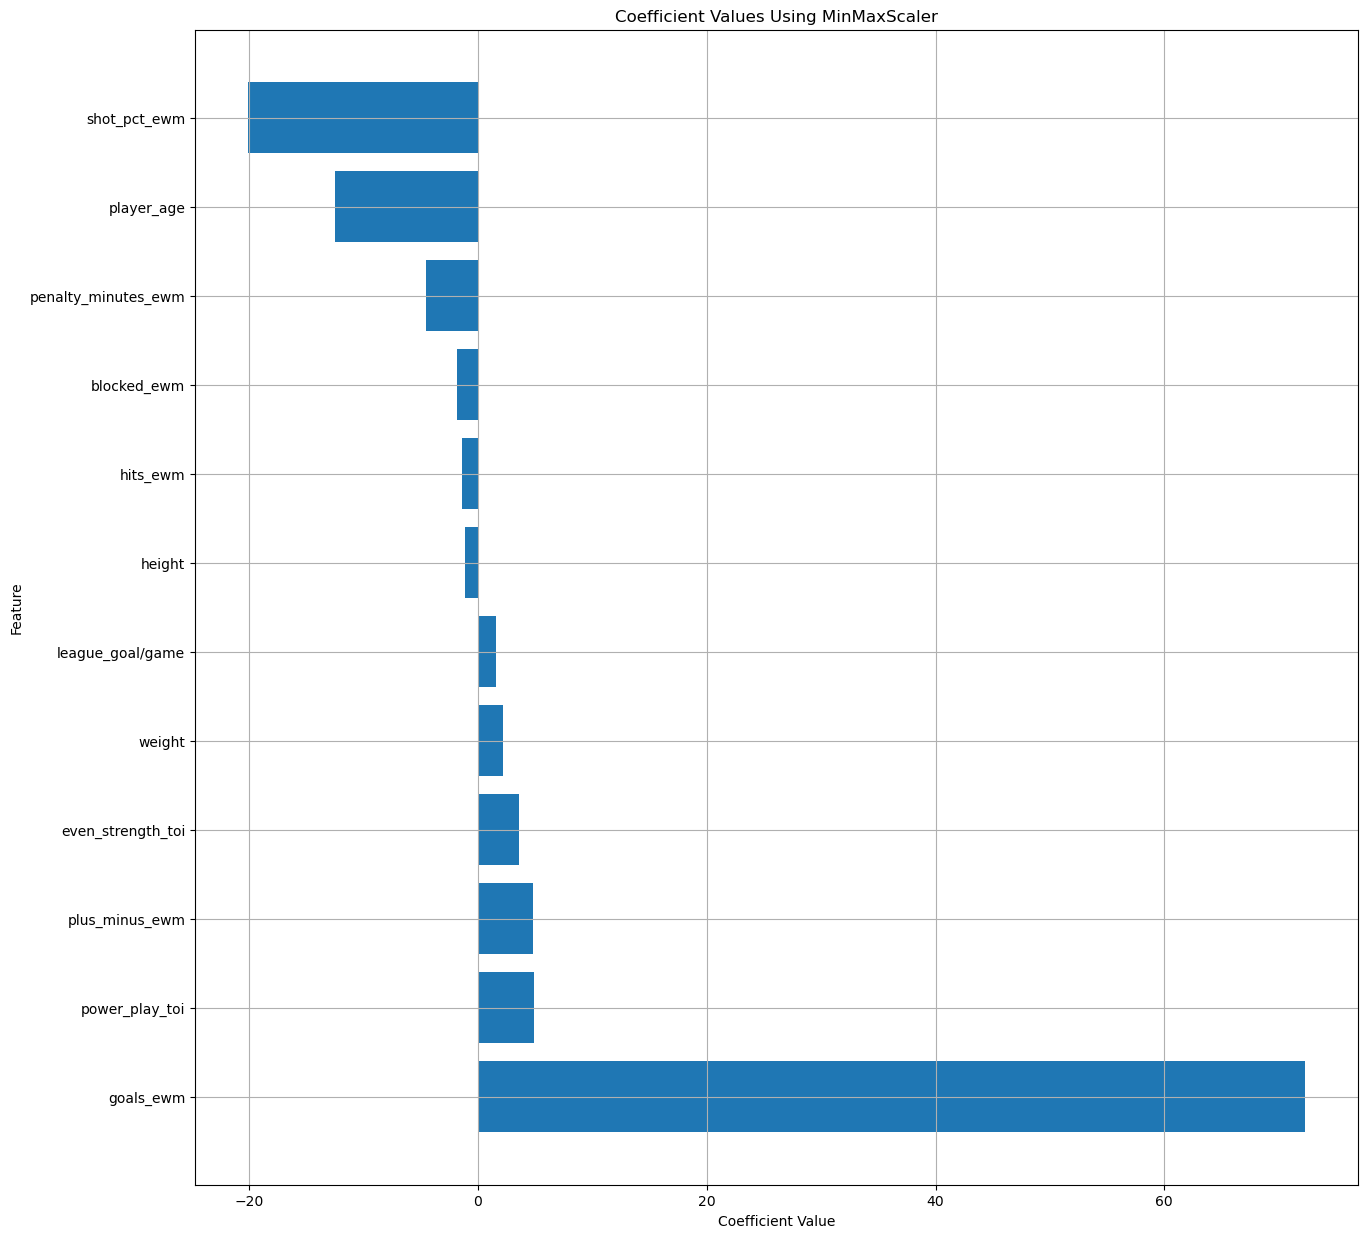

In [89]:
plt.figure(figsize=(15,15))

features = coefficients_mm['Feature']
values_mm = coefficients_mm['Coefficient']

plt.barh(features, values_mm)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Coefficient Values Using MinMaxScaler")
plt.grid()
plt.show()

#### Rescoring Accuracy w/ Margin for Error Adjustment

In [90]:
y_predict_series = pd.Series(y_predictions_mm)
y_predict_df = y_predict_series.to_frame()
y_test_df = y_test.to_frame()
y_test_df.reset_index(inplace=True, drop=True)
y_results_df = y_test_df.join(y_predict_df)
y_results_df

,target,0
0,16,14.644464
1,4,9.572702
2,20,15.254014
3,11,10.551834
4,22,15.200376
...,...,...
2696,28,19.115533
2697,15,7.926085
2698,23,20.460922
2699,3,1.603467


In [91]:
y_results_df = y_results_df.rename(columns={0:'prediction'})
y_results_df['delta'] = abs(y_results_df['target']-y_results_df['prediction'])
y_results_df.loc[y_results_df['delta'] < 3, 'truth'] = True
y_results_df.loc[y_results_df['delta'] >= 3, 'truth'] = False
y_results_df['truth'].value_counts()

truth
False    1718
True      983
Name: count, dtype: int64

In [92]:
percentage_true = y_results_df['truth'].mean() * 100
percentage_true_formatted = "{:.2f}%".format(percentage_true)
percentage_true_formatted

'36.39%'

The three blocks of code above set up a new DataFrame, y_results_df, that holds the actual values of 'y' and the predicted values of 'y' for each datapoint in y_test.  A column called `delta` is used to hold the absolute difference between actual and predicted values of 'y'.  A column called `truth` holds a True or False evaluation on if the value of `delta` is less than or equal to 2; in other words, if the predicted value of 'y' is within +/-2 goals of the actual value.

The value of `percentage_true_formatted` therefore evaluates the models accuracy at predicting the target feature within +/-2 goals.  For the simple linear regression model, with the defined margin of error, the model can make a correct prediction 36.4% of the time.

### B) Standard Scaled
Rerun the linear regression model apply standard scaling to the data.

In [93]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

In [94]:
print(X_train_ss.shape, X_test_ss.shape)

(10802, 12) (2701, 12)


#### Fit & score model


In [95]:
# instantiate linear regression model
linreg_ss = LinearRegression()

# fit the model
linreg_ss.fit(X_train_ss, y_train)

LinearRegression()

In [96]:
# get y predictions on test data
y_predictions_ss = linreg_ss.predict(X_test_ss)

# print scores and errors
print(f"Train score on scaled data: {linreg_ss.score(X_train_ss, y_train):.3f}")
print(f"Test score on scaled data: {linreg_ss.score(X_test_ss, y_test):.3f}")
print("")
print(f"R2 score for test data: {r2_score(y_test, y_predictions_ss):.3f}")
print(f"Mean Squared Error for test data: {mean_squared_error(y_test, y_predictions_ss):.3f}")
print(f"Mean Absolute Error for test data: {mean_absolute_error(y_test, y_predictions_ss):.3f}")

Train score on scaled data: 0.610
Test score on scaled data: 0.608

R2 score for test data: 0.608
Mean Squared Error for test data: 53.957
Mean Absolute Error for test data: 5.545


#### Review feature coefficients

In [97]:
# put coefficients in a dataframe
coefficients_ss = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linreg_ss.coef_.flatten()  # Flatten in case it's a 2D array with a single column
})

# sort values in place, and reset index
coefficients_ss.sort_values(by='Coefficient', ascending=False, inplace=True, ignore_index=True)

In [98]:
# take a look
coefficients_ss

,Feature,Coefficient
0,goals_ewm,9.015286
1,power_play_toi,0.683444
2,league_goal/game,0.478001
3,even_strength_toi,0.392869
4,plus_minus_ewm,0.372848
5,weight,0.303166
6,height,-0.142171
7,hits_ewm,-0.156801
8,blocked_ewm,-0.255242
9,penalty_minutes_ewm,-0.451891


It will be helpful to view the top coefficients, both positive and negative, graphically.  Create two dataframes to hold the top 10 values at each end of the spectrum (i.e., the 10 'most positive' and 10 'most negative' coefficients)

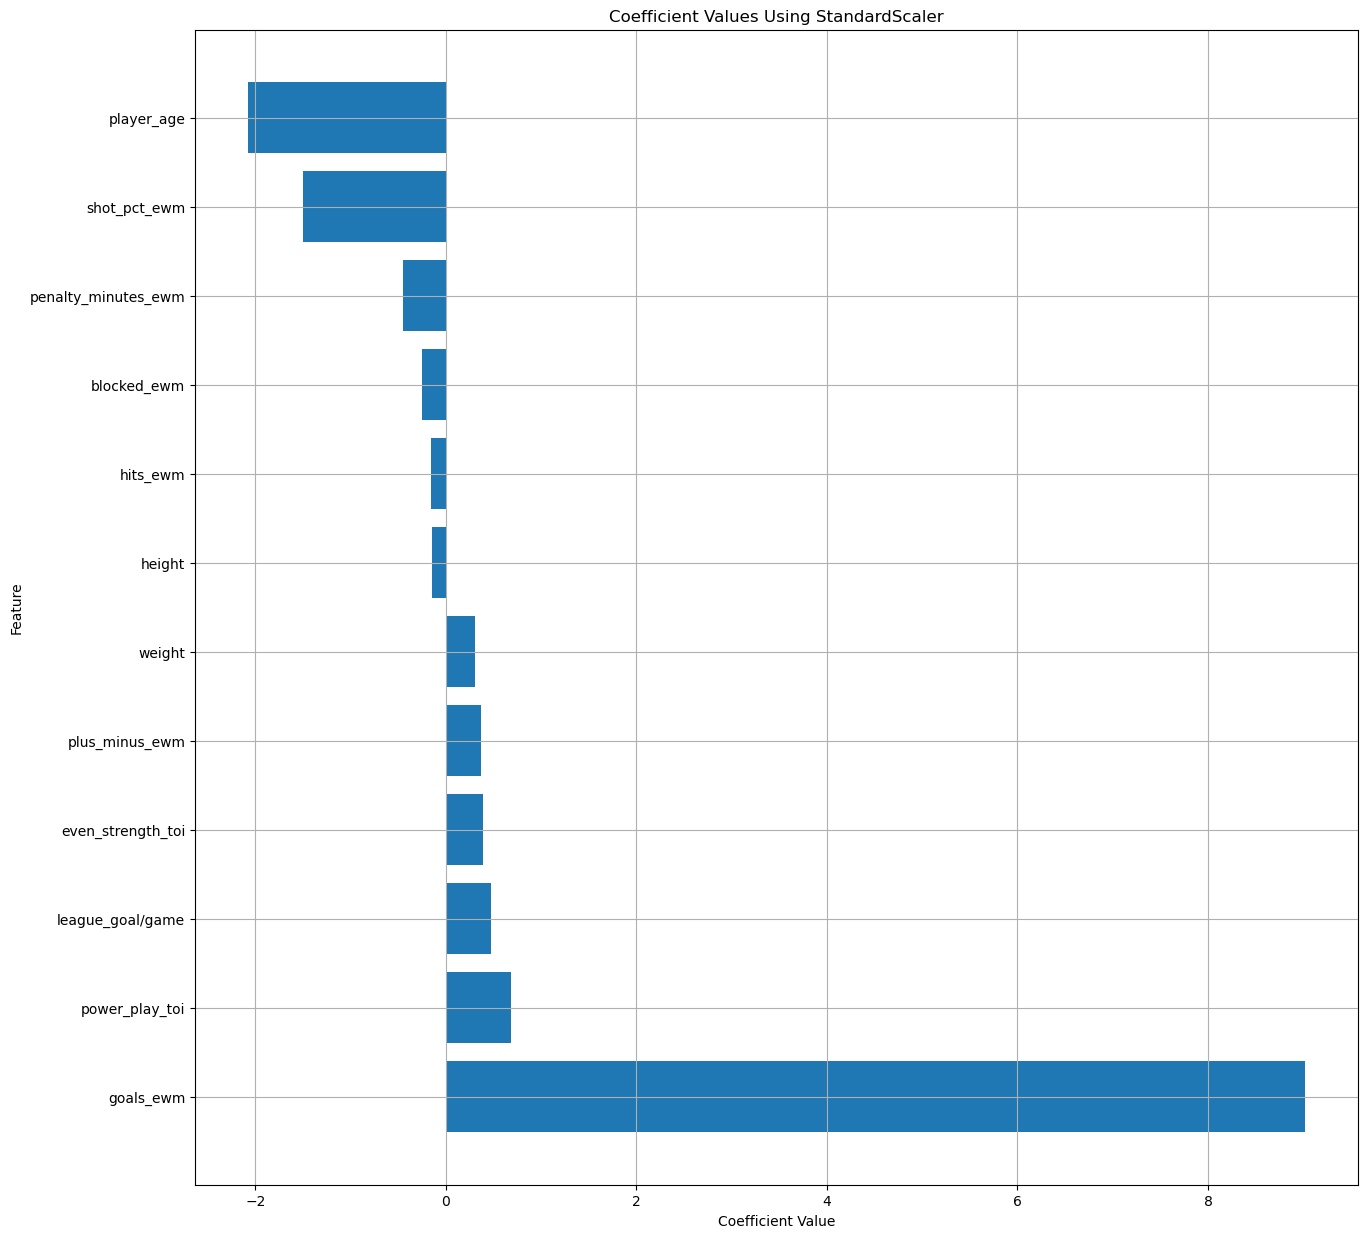

In [99]:
plt.figure(figsize=(15,15))

features = coefficients_ss['Feature']
values_ss = coefficients_ss['Coefficient']

plt.barh(features, values_ss)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Coefficient Values Using StandardScaler")
plt.grid()
plt.show()

#### Rescoring Accuracy w/ Margin for Error Adjustment

In [100]:
y_predict_series = pd.Series(y_predictions_ss)
y_predict_df = y_predict_series.to_frame()
y_test_df = y_test.to_frame()
y_test_df.reset_index(inplace=True, drop=True)
y_results_df = y_test_df.join(y_predict_df)
y_results_df

,target,0
0,16,14.644464
1,4,9.572702
2,20,15.254014
3,11,10.551834
4,22,15.200376
...,...,...
2696,28,19.115533
2697,15,7.926085
2698,23,20.460922
2699,3,1.603467


In [102]:
y_results_df = y_results_df.rename(columns={0:'prediction'})
y_results_df['delta'] = abs(y_results_df['target']-y_results_df['prediction'])
y_results_df.loc[y_results_df['delta'] < 3, 'truth'] = True
y_results_df.loc[y_results_df['delta'] >= 3, 'truth'] = False
y_results_df['truth'].value_counts()

truth
False    1858
True      843
Name: count, dtype: int64

In [103]:
percentage_true = y_results_df['truth'].mean() * 100
percentage_true_formatted = "{:.2f}%".format(percentage_true)
percentage_true_formatted

'31.21%'

The model using min-max scaling can make an accurate prediction ~5% more often than the model using standard scaling.

## Support Vector Regression <a class="anchor" id="part2" ></a>

In [116]:
# load the data
df = pd.read_csv('NHL_data_clean_ewm.csv')
pd.set_option('display.max_columns', None)

### Reorganize the DataFrame

In [117]:
# reorganize DataFrame, reference features and target feature to the front
feature_list = ['unique_id', 'player_id', 'name', 'goals_ref', 'games_played_ref', 'target']
reference_features = df[feature_list]
df.drop(columns=feature_list, inplace=True)
df = reference_features.join(df)
df.head()

,unique_id,player_id,name,goals_ref,games_played_ref,target,height,weight,season_start_yr,player_age,season_num,midseason_trade,offseason_trade,shot_pct,league_goal/game,games_played,goals,power_play_goals,shots,shifts,assists,plus_minus,penalty_minutes,hits,blocked,even_strength_toi,power_play_toi,short_handed_toi,goals_ewm,power_play_goals_ewm,shots_ewm,shifts_ewm,assists_ewm,plus_minus_ewm,penalty_minutes_ewm,hits_ewm,blocked_ewm,even_strength_toi_ewm,power_play_toi_ewm,short_handed_toi_ewm,shot_pct_ewm
0,448941984,44894,Greg Adams,35,78,37,76,196,1984,21,1.0,0,0,0.184615,3.89,36,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.5,139.44,72.66,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.5,139.44,72.66,0.184615
1,448941985,44894,Greg Adams,20,72,23,76,196,1985,22,2.0,0,0,0.173267,3.97,78,36.79,10.51,212.36,1568.69,44.15,-7.36,31.54,98.75,23.26,982.5,139.44,72.66,32.06,10.95,180.21,1568.69,32.33,-19.62,26.02,98.75,23.26,982.5,139.44,72.66,0.177929
2,448941986,44894,Greg Adams,36,80,37,76,196,1986,23,3.0,0,0,0.142857,3.67,72,22.78,6.83,159.44,1568.69,30.75,-18.22,21.64,98.75,23.26,982.5,139.44,72.66,27.42,8.89,169.83,1568.69,31.54,-18.92,23.83,98.75,23.26,982.5,139.44,72.66,0.167172
3,448941987,44894,Greg Adams,19,61,26,76,196,1987,24,4.0,0,1,0.158590,3.71,80,36.90,12.30,232.68,1568.69,41.00,-24.60,30.75,98.75,23.26,982.5,139.44,72.66,32.16,10.60,201.25,1568.69,36.27,-21.76,27.29,98.75,23.26,982.5,139.44,72.66,0.164519
4,448941988,44894,Greg Adams,30,65,38,76,196,1988,25,5.0,0,0,0.131944,3.74,61,25.54,12.10,193.57,1568.69,18.82,-28.23,32.26,98.75,23.26,982.5,139.44,72.66,28.85,11.35,197.41,1568.69,27.54,-25.00,29.78,98.75,23.26,982.5,139.44,72.66,0.157854


In [118]:
X = df.iloc[:, -35:]
y = df['target']
print(X.shape)
print(y.shape)

(13503, 35)
(13503,)


### Split the data into train and test splits


In [119]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=975)

# Check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10802, 35) (2701, 35) (10802,) (2701,)


### A) SVR, MinMaxScaler

In [120]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_train_mm = MM.fit_transform(X_train)
X_test_mm = MM.transform(X_test)

In [121]:
print(X_train_mm.shape, X_test_mm.shape)

(10802, 35) (2701, 35)


#### Fit & score model


In [60]:
# instantiate linear regression model
svr_mm = SVR()

# fit the model
svr_mm.fit(X_train_mm, y_train)

# get y predictions on test data
y_predict_mm = svr_mm.predict(X_test_mm)

# scores and errors
print(f"Train score on scaled data: {svr_mm.score(X_train_mm, y_train):.3f}")
print(f"Test score on scaled data: {svr_mm.score(X_test_mm, y_test):.3f}")

print(f"R2 score for test data: {r2_score(y_test, y_predict_mm):.3f}")
print(f"Mean Squared Error for test data: {mean_squared_error(y_test, y_predict_mm):.3f}")
print(f"Mean Absolute Error for test data: {mean_absolute_error(y_test, y_predict_mm):.3f}")

Train score on scaled data: 0.614
Test score on scaled data: 0.607
R2 score for test data: 0.607
Mean Squared Error for test data: 54.118
Mean Absolute Error for test data: 5.491


#### Rescoring Accuracy w/ Margin for Error Adjustment

In [61]:
y_predict_series = pd.Series(y_predict_mm)
y_predict_df = y_predict_series.to_frame()
y_test_df = y_test.to_frame()
y_test_df.reset_index(inplace=True, drop=True)
y_results_df = y_test_df.join(y_predict_df)
y_results_df

,target,0
0,16,14.834810
1,4,8.646859
2,20,13.272221
3,11,10.940216
4,22,15.368114
...,...,...
2696,28,18.235384
2697,15,8.047575
2698,23,15.770328
2699,3,2.475035


In [62]:
y_results_df = y_results_df.rename(columns={0:'prediction'})
y_results_df['delta'] = abs(y_results_df['target']-y_results_df['prediction'])
y_results_df.loc[y_results_df['delta'] < 3, 'truth'] = True
y_results_df.loc[y_results_df['delta'] >= 3, 'truth'] = False

In [63]:
y_results_df['truth'].value_counts()

truth
False    1678
True     1023
Name: count, dtype: int64

In [64]:
percentage_true = y_results_df['truth'].mean() * 100
percentage_true_formatted = "{:.2f}%".format(percentage_true)
percentage_true_formatted

'37.87%'

### B) SVR, Standard


In [13]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

In [14]:
print(X_train_ss.shape, X_test_ss.shape)

(10802, 35) (2701, 35)


#### Fit & score model


In [15]:
# instantiate linear regression model
svr_ss = SVR()

# fit the model
svr_ss.fit(X_train_ss, y_train)

SVR()

In [16]:
# get y predictions on test data
y_predict_ss = svr_ss.predict(X_test_ss)

# print R2 score
print(f"R2 score for test data: {svr_ss.score(X_test_ss, y_test):.3f}")
print(f"R2 score for train data: {svr_ss.score(X_train_ss, y_train):.3f}")

R2 score for test data: 0.582
R2 score for train data: 0.607


#### Rescoring Accuracy w/ Margin for Error Adjustment

In [17]:
y_predict_series = pd.Series(y_predict_ss)
y_predict_df = y_predict_series.to_frame()
y_test_df = y_test.to_frame()
y_test_df.reset_index(inplace=True, drop=True)
y_results_df = y_test_df.join(y_predict_df)
y_results_df

,target,0
0,16,14.874691
1,4,8.795467
2,20,12.589002
3,11,9.739252
4,22,14.423054
...,...,...
2696,28,18.093933
2697,15,9.020055
2698,23,14.456151
2699,3,2.542917


In [18]:
y_results_df = y_results_df.rename(columns={0:'prediction'})
# y_results_df['prediction'] = y_results_df['prediction'].round().astype(int)
y_results_df

,target,prediction
0,16,14.874691
1,4,8.795467
2,20,12.589002
3,11,9.739252
4,22,14.423054
...,...,...
2696,28,18.093933
2697,15,9.020055
2698,23,14.456151
2699,3,2.542917


In [19]:
y_results_df['delta'] = abs(y_results_df['target']-y_results_df['prediction'])
y_results_df.loc[y_results_df['delta'] < 3, 'truth'] = True
y_results_df.loc[y_results_df['delta'] >= 3, 'truth'] = False

In [20]:
y_results_df['truth'].value_counts()

truth
False    1676
True     1025
Name: count, dtype: int64

In [21]:
percentage_true = y_results_df['truth'].mean() * 100
percentage_true_formatted = "{:.2f}%".format(percentage_true)
percentage_true_formatted

'37.95%'

### Evaluating SVR Model Performance
The SVR model using standard scaling performed slightly better at predicting the value of the target feature (37.87% min-max scaling vs. 37.95% standard scaling), but the model using min-max scaling was able to explain 60.7% of the variance in the test data, versus 58.2% for the model using standard scaling on the data.  Therefore, the min-max scaling is considered the better option.

### Hyperparamter Tuning Using Pipeline
Using min-max scaling, complete hyperparameter tuning of the SVR model to find the optimal mix of hyperparameters.  The hyperparameter tuning will be done with a pipeline passed through a grid search, with five folds of cross-validation.  10% of the data will be kept separate for testing.

In [65]:
# Resplit the data so we have a validation set as well
# Splitting out 10% for test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.1, random_state=975)

In [35]:
# instantiate pipeline
estimators = [('normalise', MinMaxScaler()),
              ('model', SVR())]

pipe = Pipeline(estimators)

The first set of hyperparameters will be the kernel and C-values.  The kernel options tested will be rbf (default), linear, and poly.  C-values should be on a log scale; test 0.1, 1, and 10.

In [36]:
# comparing performance of different models with a list of dictionaries
param_grid = [
            {'model': [SVR()], 
             'normalise': [MinMaxScaler()],
             'model__kernel': ['linear', 'poly', 'rbf'],
             'model__C': [0.1, 1, 10]}
]

# run grid search with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)

# fit grid to X and y data
fittedgrid = grid.fit(X_remainder, y_remainder)

In [38]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', MinMaxScaler()), ('model', SVR(C=10))])

In [39]:
# Best hyperparameters
fittedgrid.best_params_

{'model': SVR(C=10),
 'model__C': 10,
 'model__kernel': 'rbf',
 'normalise': MinMaxScaler()}

Based on the first grid search, the optimal hyperparameters are rbf for kernel, and 10 for C. <br>
Run a second pipeline with more values of C and values of epsilon. <br>
Values of epsilon should be relative to standard deviation of the target feature, which is 11 --> start with a value 1/10 of std dev; i.e., 1.1

In [33]:
# calculate standard deviation of 'y'
y.std()

11.764540991013751

In [49]:
estimators2 = [('normalise', MinMaxScaler()),
              ('model', SVR())]

pipe2 = Pipeline(estimators)

In [50]:
# second parameter grid
param_grid2 = [
            {'model': [SVR()], 
             'normalise': [MinMaxScaler()],
             'model__kernel': ['rbf'],
             'model__C': [10, 100, 1000],
             'model__epsilon': [0.5, 1.1, 2.2, 5]}
]

grid2 = GridSearchCV(pipe2, param_grid2, cv=5)
fittedgrid2 = grid2.fit(X_remainder, y_remainder)

In [51]:
# Best estimator object
fittedgrid2.best_estimator_

Pipeline(steps=[('normalise', MinMaxScaler()), ('model', SVR(C=10, epsilon=5))])

In [52]:
# Best hyperparameters
fittedgrid2.best_params_

{'model': SVR(C=10, epsilon=5),
 'model__C': 10,
 'model__epsilon': 5,
 'model__kernel': 'rbf',
 'normalise': MinMaxScaler()}

### Fit the Optimized Model
The best hyperparameter mix after running the two grid searches is:
- C: 10
- epsilon: 5
- kernel: 'rbf'

Fit an SVR model with the above hyperparameters and score it on the test data.

In [122]:
# Resplit the data so we have a validation set as well
# Splitting out 10% for test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.1, random_state=975)

In [123]:
# Scale the data
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_remainder = MM.fit_transform(X_remainder)
X_test = MM.transform(X_test)

In [124]:
print(X_remainder.shape, X_test.shape)

(12152, 35) (1351, 35)


Instantiate model, with hyperparameters

In [125]:
# instantiate linear regression model
svr_final = SVR(kernel='rbf', C=10, epsilon=5)

# fit the model
svr_final.fit(X_remainder, y_remainder)

SVR(C=10, epsilon=5)

In [126]:
# get y predictions on test data
y_predict = svr_final.predict(X_test)

# scores and errors
print(f"Train score on scaled data: {svr_final.score(X_remainder, y_remainder):.3f}")
print(f"Test score on scaled data: {svr_final.score(X_test, y_test):.3f}")
print("")
print(f"R2 score for test data: {r2_score(y_test, y_predict):.3f}")
print(f"Mean Squared Error for test data: {mean_squared_error(y_test, y_predict):.3f}")
print(f"Mean Absolute Error for test data: {mean_absolute_error(y_test, y_predict):.3f}")

Train score on scaled data: 0.644
Test score on scaled data: 0.629

R2 score for test data: 0.629
Mean Squared Error for test data: 49.126
Mean Absolute Error for test data: 5.297


#### Rescoring Accuracy w/ Margin for Error Adjustment

In [127]:
y_predict_series = pd.Series(y_predict)
y_predict_df = y_predict_series.to_frame()
y_test_df = y_test.to_frame()
y_test_df.reset_index(inplace=True, drop=True)
y_results_df = y_test_df.join(y_predict_df)
y_results_df

,target,0
0,16,15.929888
1,4,10.424937
2,20,13.945583
3,11,12.158954
4,22,16.174982
...,...,...
1346,3,5.594560
1347,14,17.596106
1348,4,11.084492
1349,12,19.576791


In [128]:
y_results_df = y_results_df.rename(columns={0:'prediction'})
y_results_df['delta'] = abs(y_results_df['target']-y_results_df['prediction'])
y_results_df.loc[y_results_df['delta'] < 3, 'truth'] = True
y_results_df.loc[y_results_df['delta'] >= 3, 'truth'] = False

In [129]:
percentage_true = y_results_df['truth'].mean() * 100
percentage_true_formatted = "{:.2f}%".format(percentage_true)
percentage_true_formatted

'38.27%'

After hyperparameter tuning, the R2 score increased by 2.2%, and the prediction accuracy increased by ~0.5%.

#### Visualize Results
Visualize the results by plotting 'y' predictions as a line, and 'y' actual values as a scatter plot over top.

In [130]:
results_df = y_results_df.sort_values(by=['prediction'])
results_df.reset_index(inplace=True)
results_df.reset_index(inplace=True)

In [131]:
results_df

,level_0,index,target,prediction,delta,truth
0,0,875,2,2.470763,0.470763,True
1,1,984,5,2.779217,2.220783,True
2,2,790,0,2.880601,2.880601,True
3,3,267,2,3.038680,1.038680,True
4,4,358,0,3.095623,3.095623,False
...,...,...,...,...,...,...
1346,1346,261,67,48.474322,18.525678,False
1347,1347,890,43,50.953448,7.953448,False
1348,1348,321,52,53.112167,1.112167,True
1349,1349,14,57,53.128343,3.871657,False


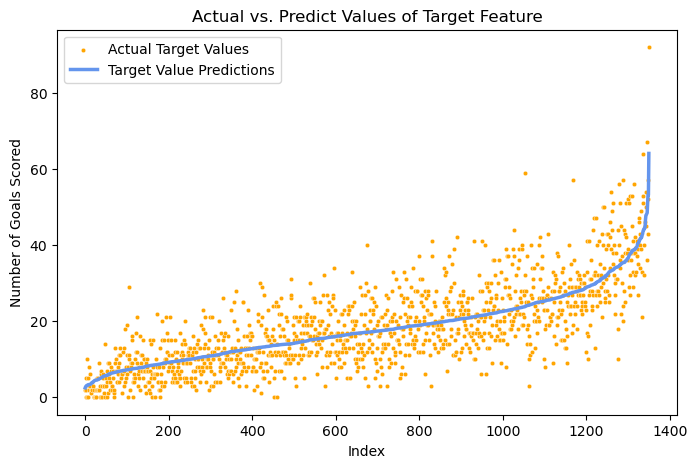

In [132]:
plt.figure(figsize=(8,5))

# Create a scatter plot for feature1
sns.scatterplot(x=results_df.index, y='target', data=results_df, color='orange', label='Actual Target Values', s=10)

# Add a line plot for feature2
plt.plot(results_df.index, 'prediction', data=results_df, color='cornflowerblue', label='Target Value Predictions', linewidth=2.5)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Number of Goals Scored')
plt.title('Actual vs. Predict Values of Target Feature')

# Show the plot
plt.legend()
plt.show()


#### Save Model

In [134]:
# Save the final SVR model
import joblib
joblib.dump(svr_final, 'goals_predict_svr.pkl') 

['goals_predict_svr.pkl']

## K-Nearest Neighbors Regression <a class="anchor" id="part3" ></a>
Next model to try is KNN Regression.  Only min-max scaling will be used, as it has yielded better results on both of the prior models.

In [135]:
# load the data
df = pd.read_csv('NHL_data_clean_ewm.csv')
pd.set_option('display.max_columns', None)

### Reorganize the DataFrame

In [136]:
# reorganize DataFrame, reference features and target feature to the front
feature_list = ['unique_id', 'player_id', 'name', 'goals_ref', 'games_played_ref', 'target']
reference_features = df[feature_list]
df.drop(columns=feature_list, inplace=True)
df = reference_features.join(df)
df.head()

,unique_id,player_id,name,goals_ref,games_played_ref,target,height,weight,season_start_yr,player_age,season_num,midseason_trade,offseason_trade,shot_pct,league_goal/game,games_played,goals,power_play_goals,shots,shifts,assists,plus_minus,penalty_minutes,hits,blocked,even_strength_toi,power_play_toi,short_handed_toi,goals_ewm,power_play_goals_ewm,shots_ewm,shifts_ewm,assists_ewm,plus_minus_ewm,penalty_minutes_ewm,hits_ewm,blocked_ewm,even_strength_toi_ewm,power_play_toi_ewm,short_handed_toi_ewm,shot_pct_ewm
0,448941984,44894,Greg Adams,35,78,37,76,196,1984,21,1.0,0,0,0.184615,3.89,36,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.5,139.44,72.66,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.5,139.44,72.66,0.184615
1,448941985,44894,Greg Adams,20,72,23,76,196,1985,22,2.0,0,0,0.173267,3.97,78,36.79,10.51,212.36,1568.69,44.15,-7.36,31.54,98.75,23.26,982.5,139.44,72.66,32.06,10.95,180.21,1568.69,32.33,-19.62,26.02,98.75,23.26,982.5,139.44,72.66,0.177929
2,448941986,44894,Greg Adams,36,80,37,76,196,1986,23,3.0,0,0,0.142857,3.67,72,22.78,6.83,159.44,1568.69,30.75,-18.22,21.64,98.75,23.26,982.5,139.44,72.66,27.42,8.89,169.83,1568.69,31.54,-18.92,23.83,98.75,23.26,982.5,139.44,72.66,0.167172
3,448941987,44894,Greg Adams,19,61,26,76,196,1987,24,4.0,0,1,0.158590,3.71,80,36.90,12.30,232.68,1568.69,41.00,-24.60,30.75,98.75,23.26,982.5,139.44,72.66,32.16,10.60,201.25,1568.69,36.27,-21.76,27.29,98.75,23.26,982.5,139.44,72.66,0.164519
4,448941988,44894,Greg Adams,30,65,38,76,196,1988,25,5.0,0,0,0.131944,3.74,61,25.54,12.10,193.57,1568.69,18.82,-28.23,32.26,98.75,23.26,982.5,139.44,72.66,28.85,11.35,197.41,1568.69,27.54,-25.00,29.78,98.75,23.26,982.5,139.44,72.66,0.157854


### Split the data into train and test splits

In [137]:
X = df.iloc[:, -35:]
y = df['target']
print(X.shape)
print(y.shape)

(13503, 35)
(13503,)


In [138]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=975)

# Check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10802, 35) (2701, 35) (10802,) (2701,)


### Scale the Data


In [139]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_train_mm = MM.fit_transform(X_train)
X_test_mm = MM.transform(X_test)

In [140]:
print(X_train_mm.shape, X_test_mm.shape)

(10802, 35) (2701, 35)


#### Fit & score model


In [141]:
# instantiate linear regression model
knn_mm = KNeighborsRegressor()

# fit the model
knn_mm.fit(X_train_mm, y_train)

KNeighborsRegressor()

In [142]:
# get y predictions on test data
y_predict_mm = knn_mm.predict(X_test_mm)

# scores and errors
print(f"Train score on scaled data: {knn_mm.score(X_train_mm, y_train):.3f}")
print(f"Test score on scaled data: {knn_mm.score(X_test_mm, y_test):.3f}")
print("")
print(f"R2 score for test data: {r2_score(y_test, y_predict_mm):.3f}")
print(f"Mean Squared Error for test data: {mean_squared_error(y_test, y_predict_mm):.3f}")
print(f"Mean Absolute Error for test data: {mean_absolute_error(y_test, y_predict_mm):.3f}")

Train score on scaled data: 0.694
Test score on scaled data: 0.543

R2 score for test data: 0.543
Mean Squared Error for test data: 63.013
Mean Absolute Error for test data: 6.042


#### Rescoring Accuracy w/ Margin for Error Adjustment

In [143]:
y_predict_series = pd.Series(y_predict_mm)
y_predict_df = y_predict_series.to_frame()
y_test_df = y_test.to_frame()
y_test_df.reset_index(inplace=True, drop=True)
y_results_df = y_test_df.join(y_predict_df)
y_results_df

,target,0
0,16,8.6
1,4,8.6
2,20,12.0
3,11,9.8
4,22,14.0
...,...,...
2696,28,26.0
2697,15,5.8
2698,23,12.6
2699,3,5.4


In [144]:
y_results_df = y_results_df.rename(columns={0:'prediction'})
y_results_df['delta'] = abs(y_results_df['target']-y_results_df['prediction'])
y_results_df.loc[y_results_df['delta'] < 3, 'truth'] = True
y_results_df.loc[y_results_df['delta'] >= 3, 'truth'] = False
y_results_df['truth'].value_counts()

truth
False    1836
True      865
Name: count, dtype: int64

In [145]:
percentage_true = y_results_df['truth'].mean() * 100
percentage_true_formatted = "{:.2f}%".format(percentage_true)
percentage_true_formatted

'32.03%'

## Gradient Boosting Regression <a class="anchor" id="part4" ></a>
Last model to try is Gradient Boosting Regression, with min-max scaling applied to the data.

In [154]:
# load the data
df = pd.read_csv('NHL_data_clean_ewm.csv')
pd.set_option('display.max_columns', None)

### Reorganize the DataFrame

In [155]:
# reorganize DataFrame, reference features and target feature to the front
feature_list = ['unique_id', 'player_id', 'name', 'goals_ref', 'games_played_ref', 'target']
reference_features = df[feature_list]
df.drop(columns=feature_list, inplace=True)
df = reference_features.join(df)
df.head()

,unique_id,player_id,name,goals_ref,games_played_ref,target,height,weight,season_start_yr,player_age,season_num,midseason_trade,offseason_trade,shot_pct,league_goal/game,games_played,goals,power_play_goals,shots,shifts,assists,plus_minus,penalty_minutes,hits,blocked,even_strength_toi,power_play_toi,short_handed_toi,goals_ewm,power_play_goals_ewm,shots_ewm,shifts_ewm,assists_ewm,plus_minus_ewm,penalty_minutes_ewm,hits_ewm,blocked_ewm,even_strength_toi_ewm,power_play_toi_ewm,short_handed_toi_ewm,shot_pct_ewm
0,448941984,44894,Greg Adams,35,78,37,76,196,1984,21,1.0,0,0,0.184615,3.89,36,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.5,139.44,72.66,27.33,11.39,148.06,1568.69,20.50,-31.89,20.50,98.75,23.26,982.5,139.44,72.66,0.184615
1,448941985,44894,Greg Adams,20,72,23,76,196,1985,22,2.0,0,0,0.173267,3.97,78,36.79,10.51,212.36,1568.69,44.15,-7.36,31.54,98.75,23.26,982.5,139.44,72.66,32.06,10.95,180.21,1568.69,32.33,-19.62,26.02,98.75,23.26,982.5,139.44,72.66,0.177929
2,448941986,44894,Greg Adams,36,80,37,76,196,1986,23,3.0,0,0,0.142857,3.67,72,22.78,6.83,159.44,1568.69,30.75,-18.22,21.64,98.75,23.26,982.5,139.44,72.66,27.42,8.89,169.83,1568.69,31.54,-18.92,23.83,98.75,23.26,982.5,139.44,72.66,0.167172
3,448941987,44894,Greg Adams,19,61,26,76,196,1987,24,4.0,0,1,0.158590,3.71,80,36.90,12.30,232.68,1568.69,41.00,-24.60,30.75,98.75,23.26,982.5,139.44,72.66,32.16,10.60,201.25,1568.69,36.27,-21.76,27.29,98.75,23.26,982.5,139.44,72.66,0.164519
4,448941988,44894,Greg Adams,30,65,38,76,196,1988,25,5.0,0,0,0.131944,3.74,61,25.54,12.10,193.57,1568.69,18.82,-28.23,32.26,98.75,23.26,982.5,139.44,72.66,28.85,11.35,197.41,1568.69,27.54,-25.00,29.78,98.75,23.26,982.5,139.44,72.66,0.157854


### Split the data into train and test splits

In [156]:
X = df.iloc[:, -35:]
y = df['target']
print(X.shape)
print(y.shape)

(13503, 35)
(13503,)


In [157]:
# remove collinear features to temper model complexity
X.drop(columns=['goals', 'power_play_goals', 'assists', 'shots_ewm', 'power_play_toi_ewm', \
                      'even_strength_toi_ewm', 'shifts_ewm', 'blocked', 'hits', \
                      'short_handed_toi', 'plus_minus', 'penalty_minutes'], inplace=True)

In [158]:
# Resplit the data so we have a validation set as well
# Splitting out 10% for test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.1, random_state=975)

### Hyperparamter Tuning Using Pipeline
Hyperparameters to tune:
- learning_rate
- n_estimators
- min_samples_split
- min_samples_leaf
- max_depth
- loss

In [159]:
estimators = [('normalise', MinMaxScaler()),
              ('model', GradientBoostingRegressor())]

pipe = Pipeline(estimators)

In [11]:
# comparing performance of different models with a list of dictionaries
param_grid = [
            {'model': [GradientBoostingRegressor()], 
             'normalise': [MinMaxScaler()],
             'model__random_state':  [975],
             #'model__loss': ['squared_error', 'absolute_error'],
             'model__learning_rate': [0.01, 0.1, 0.2],
             'model__n_estimators': [100, 500, 1000],
             # 'model__min_samples_leaf': [10, 100, 1000],
             'model__min_samples_split': [50, 100, 200],
             'model__max_depth': [3, 6, 10],
             'model__verbose': [1]
            }
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_remainder, y_remainder)

      Iter       Train Loss   Remaining Time 
         1         137.7411            9.99s
         2         136.2326            9.37s
         3         134.7539            9.40s
         4         133.3045            9.47s
         5         131.8795            9.48s
         6         130.4825            9.39s
         7         129.1163            9.33s
         8         127.7768            9.26s
         9         126.4595            9.19s
        10         125.1656            9.09s
        20         113.5340            8.11s
        30         103.9068            7.11s
        40          95.9033            6.14s
        50          89.2319            5.12s
        60          83.6400            4.09s
        70          78.9176            3.07s
        80          74.9464            2.04s
        90          71.5905            1.02s
       100          68.7279            0.00s
      Iter       Train Loss   Remaining Time 
         1         136.3219            9.40s
        

In [12]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', MinMaxScaler()),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01,
                                           min_samples_split=50,
                                           n_estimators=1000, random_state=975,
                                           verbose=1))])

In [13]:
# Best hyperparameters
fittedgrid.best_params_

{'model': GradientBoostingRegressor(learning_rate=0.01, min_samples_split=50,
                           n_estimators=1000, random_state=975, verbose=1),
 'model__learning_rate': 0.01,
 'model__max_depth': 3,
 'model__min_samples_split': 50,
 'model__n_estimators': 1000,
 'model__random_state': 975,
 'model__verbose': 1,
 'normalise': MinMaxScaler()}

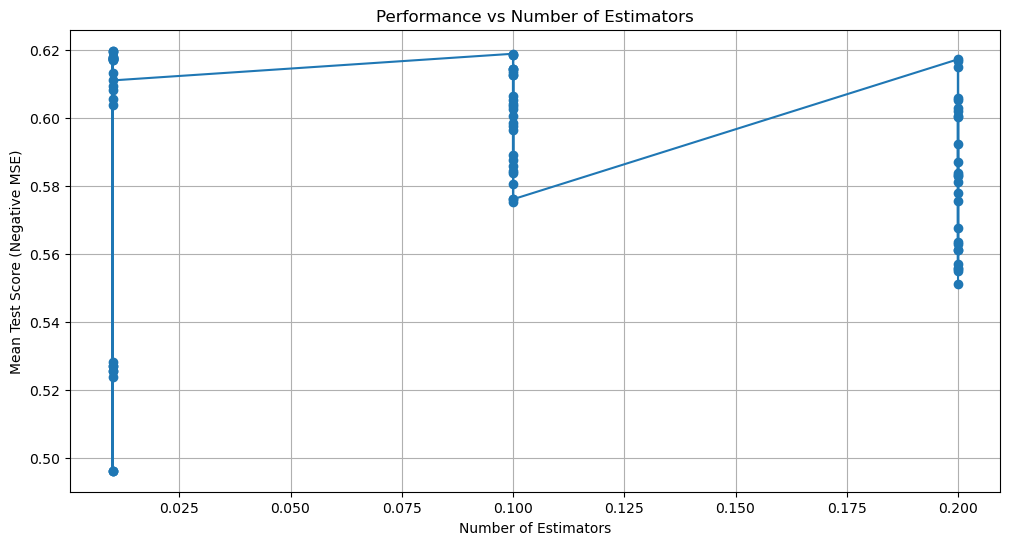

In [73]:
# Convert the cv_results to a DataFrame
results = pd.DataFrame(fittedgrid.cv_results_)

# For example, plot mean test score for each parameter setting
plt.figure(figsize=(12, 6))
plt.plot(results['param_model__learning_rate'], results['mean_test_score'], marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Negative MSE)')
plt.title('Performance vs Number of Estimators')
plt.grid(True)
plt.show()

In [71]:
print(results.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model', 'param_model__learning_rate', 'param_model__max_depth',
       'param_model__min_samples_split', 'param_model__n_estimators',
       'param_model__random_state', 'param_model__verbose', 'param_normalise',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


Run a second grid search with more values of `min_samples_split` and values of `min_samples_leaf`

In [34]:
estimators2 = [('normalise', MinMaxScaler()),
              ('model', GradientBoostingRegressor())]

pipe2 = Pipeline(estimators2)

In [48]:
# comparing performance of different models with a list of dictionaries
param_grid2 = [
            {'model': [GradientBoostingRegressor()], 
             'normalise': [MinMaxScaler()],
             'model__random_state':  [975],
             # 'model__loss': ['squared_error', 'absolute_error'],
             'model__learning_rate': [0.01],
             'model__n_estimators': [500],  # 1000 appears to be overfitting, use 500
             'model__min_samples_leaf': [10, 100],
             'model__min_samples_split': [20, 50],
             'model__max_depth': [3],
             'model__verbose': [1]
            }
]

grid2 = GridSearchCV(pipe2, param_grid2, cv=5)
fittedgrid2 = grid2.fit(X_remainder, y_remainder)

      Iter       Train Loss   Remaining Time 
         1         137.7411           48.01s
         2         136.2326           49.51s
         3         134.7539           54.88s
         4         133.3045           55.42s
         5         131.8795           54.25s
         6         130.4825           53.78s
         7         129.1163           53.16s
         8         127.7768           52.72s
         9         126.4595           52.49s
        10         125.1656           52.39s
        20         113.5340           49.94s
        30         103.9068           48.77s
        40          95.9033           47.49s
        50          89.2319           46.29s
        60          83.6400           45.28s
        70          78.9176           44.28s
        80          74.9464           43.25s
        90          71.5905           42.16s
       100          68.7279           41.16s
       200          55.1570           30.74s
       300          51.6961           20.42s
       40

In [49]:
# Best estimator object
fittedgrid2.best_estimator_

Pipeline(steps=[('normalise', MinMaxScaler()),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01,
                                           min_samples_leaf=10,
                                           min_samples_split=50,
                                           n_estimators=500, random_state=975,
                                           verbose=1))])

In [50]:
# Best hyperparameters
fittedgrid2.best_params_

{'model': GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=10,
                           min_samples_split=50, n_estimators=500,
                           random_state=975, verbose=1),
 'model__learning_rate': 0.01,
 'model__max_depth': 3,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 50,
 'model__n_estimators': 500,
 'model__random_state': 975,
 'model__verbose': 1,
 'normalise': MinMaxScaler()}

Run a final grid search to compare results using two different loss functions:  squared error, and absolute error.

In [51]:
# comparing performance of different models with a list of dictionaries
param_grid3 = [
            {'model': [GradientBoostingRegressor()], 
             'normalise': [MinMaxScaler()],
             'model__random_state':  [975],
             'model__loss': ['squared_error', 'absolute_error'],
             'model__learning_rate': [0.01],
             'model__n_estimators': [500], 
             'model__min_samples_leaf': [10],
             'model__min_samples_split': [50],
             'model__max_depth': [3],
             'model__verbose': [1]
            }
]

grid3 = GridSearchCV(pipe2, param_grid3, cv=5)
fittedgrid3 = grid3.fit(X_remainder, y_remainder)

      Iter       Train Loss   Remaining Time 
         1         137.7411           47.43s
         2         136.2326           51.30s
         3         134.7539           48.75s
         4         133.3045           51.97s
         5         131.8795           51.54s
         6         130.4825           51.31s
         7         129.1163           50.94s
         8         127.7768           50.83s
         9         126.4595           50.98s
        10         125.1656           50.71s
        20         113.5340           49.10s
        30         103.9068           48.39s
        40          95.9033           47.06s
        50          89.2319           45.97s
        60          83.6400           44.90s
        70          78.9176           43.85s
        80          74.9464           42.82s
        90          71.5905           41.72s
       100          68.7279           40.73s
       200          55.1570           30.45s
       300          51.6961           20.30s
       40

In [52]:
# Best estimator object
fittedgrid3.best_estimator_

Pipeline(steps=[('normalise', MinMaxScaler()),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01,
                                           min_samples_leaf=10,
                                           min_samples_split=50,
                                           n_estimators=500, random_state=975,
                                           verbose=1))])

In [53]:
# Best hyperparameters
fittedgrid3.best_params_

{'model': GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=10,
                           min_samples_split=50, n_estimators=500,
                           random_state=975, verbose=1),
 'model__learning_rate': 0.01,
 'model__loss': 'squared_error',
 'model__max_depth': 3,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 50,
 'model__n_estimators': 500,
 'model__random_state': 975,
 'model__verbose': 1,
 'normalise': MinMaxScaler()}

### Fit the Optimized Model
Best hyperparameter mix:
- learning_rate: 0.01
- min_samples_leaf: 10
- min_samples_split: 50
- n_estimators: 500  (the grid search suggested to use 1,000, but the training logs suggested that 500 is a more optimal value - above 500 there are diminishing returns on error correction)
- max_depth: 3

Now that we have optimized our hyperparameters, let's fit a GradientBoostingRegressor model, using a pipeline, and then save it like we have saved our other models.

Scale the data first.

In [160]:
# Resplit the data so we have a validation set as well
# Splitting out 10% for test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.1, random_state=975)

In [161]:
# Scale the data
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_remainder = MM.fit_transform(X_remainder)
X_test = MM.transform(X_test)

In [162]:
print(X_remainder.shape, X_test.shape)

(12152, 23) (1351, 23)


Instantiate model, with hyperparameters

In [163]:
# instantiate linear regression model
gbr_final = GradientBoostingRegressor(learning_rate=0.1, min_samples_leaf=10, min_samples_split=50, n_estimators=500, random_state=975, max_depth=3)

# fit the model
gbr_final.fit(X_remainder, y_remainder)

GradientBoostingRegressor(min_samples_leaf=10, min_samples_split=50,
                          n_estimators=500, random_state=975)

In [164]:
# get y predictions on test data
y_predict = gbr_final.predict(X_test)

# scores and errors
print(f"Train score on scaled data: {gbr_final.score(X_remainder, y_remainder):.3f}")
print(f"Test score on scaled data: {gbr_final.score(X_test, y_test):.3f}")
print("")
print(f"R2 score for test data: {r2_score(y_test, y_predict):.3f}")
print(f"Mean Squared Error for test data: {mean_squared_error(y_test, y_predict):.3f}")
print(f"Mean Absolute Error for test data: {mean_absolute_error(y_test, y_predict):.3f}")

Train score on scaled data: 0.709
Test score on scaled data: 0.618

R2 score for test data: 0.618
Mean Squared Error for test data: 50.519
Mean Absolute Error for test data: 5.414


#### Rescoring Accuracy w/ Margin for Error Adjustment

In [165]:
y_predict_series = pd.Series(y_predict)
y_predict_df = y_predict_series.to_frame()
y_test_df = y_test.to_frame()
y_test_df.reset_index(inplace=True, drop=True)
y_results_df = y_test_df.join(y_predict_df)
y_results_df

,target,0
0,16,15.521331
1,4,9.064924
2,20,14.863925
3,11,12.796734
4,22,17.218015
...,...,...
1346,3,4.701904
1347,14,18.797380
1348,4,10.432962
1349,12,20.454330


In [166]:
y_results_df = y_results_df.rename(columns={0:'prediction'})
y_results_df['delta'] = abs(y_results_df['target']-y_results_df['prediction'])
y_results_df.loc[y_results_df['delta'] < 3, 'truth'] = True
y_results_df.loc[y_results_df['delta'] >= 3, 'truth'] = False

In [167]:
percentage_true = y_results_df['truth'].mean() * 100
percentage_true_formatted = "{:.2f}%".format(percentage_true)
percentage_true_formatted

'37.38%'

#### Visualize Results

In [62]:
results_df = y_results_df.sort_values(by=['prediction'])
results_df.reset_index(inplace=True)
results_df.reset_index(inplace=True)

In [63]:
results_df

,level_0,index,target,prediction,delta,truth
0,0,875,2,0.708220,1.291780,True
1,1,618,2,1.243740,0.756260,True
2,2,1055,3,1.659201,1.340799,True
3,3,90,2,1.715930,0.284070,True
4,4,1215,1,1.894896,0.894896,True
...,...,...,...,...,...,...
1346,1346,261,67,51.853881,15.146119,False
1347,1347,14,57,55.394267,1.605733,True
1348,1348,321,52,56.005888,4.005888,False
1349,1349,890,43,62.509109,19.509109,False


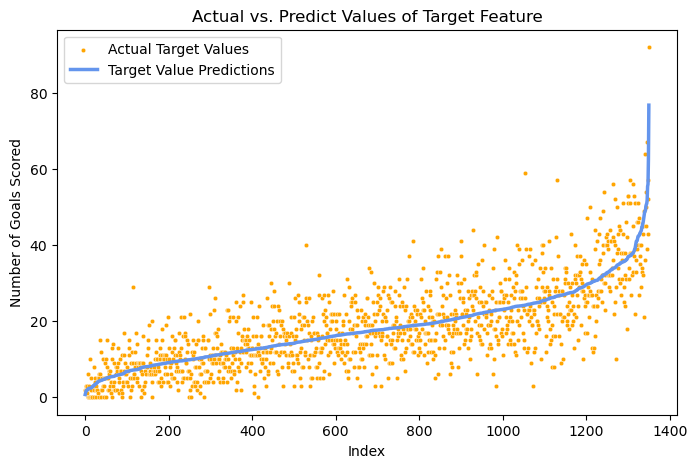

In [64]:
plt.figure(figsize=(8,5))

# Create a scatter plot for feature1
sns.scatterplot(x=results_df.index, y='target', data=results_df, color='orange', label='Actual Target Values', s=10)

# Add a line plot for feature2
plt.plot(results_df.index, 'prediction', data=results_df, color='cornflowerblue', label='Target Value Predictions', linewidth=2.5)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Number of Goals Scored')
plt.title('Actual vs. Predict Values of Target Feature')

# Show the plot
plt.legend()
plt.show()


#### Save Model

In [168]:
# Save the final DTC model
joblib.dump(gbr_final, 'goals_predict_gbr.pkl') 

['goals_predict_gbr.pkl']

## Findings & Interpretations <a class="anchor" id="part5" ></a>
The best performing model of the ones tested was the Support Vector Regression model optimized with hyperparameter tuning.  The successful model was able to predict values of the target feature 38.3% of the time within a margin of error of +/-2 goals.  The model was able to explain 62.9% of the variance in the target feature in the test dataset, and 64.4% of the variance in the target feature in the training dataset.  The closeness of these values also suggests that it was able to achieve these metrics without overfitting on the training data.  

Overall, even the best performing model was not very successful at predicting the target feature.  There are several factors that could contribute to this result:
- There is a high amount of variance in the target feature - players can have up and down seasons, and the results of performance in past seasons are not alwasy reliable indicators when it comes to predicting future performance
- The models tested may not be sophisticated enough to capture certain trends, such as the impact of teammate quality on a player's performance
- The model may be trying to fit a single regression curve on multiple player type clusters - there are options to further segment the data to help address this, but the lingering concern is the size of the dataset
- The data may have been biased when the null values were filled in with average values.  Again, in an ideal world, the entries with null values could be omitted, but it would remove ~40% of the datapoints in the dataset.

### Next Steps
There are several next steps that I will be following up on to further explore the possibilities of this project:
- Create an ordinally encoded feature that gives higher weighting to the entries that did not originally contain null values (the entries with null values were for the seasons prior to 1997-1998)
- Engineer a feature that captures a player's goal output relative to the output of their teammates for a given season - this could help provide the model with the desired context about the quality of a player's teammates, which I hoped to achieve by encoding the franchise names into individual features
- Try running the full cleaned dataset, including the encoded franchise names, through a neural network and see if it can derive some additional context through deep learning, and achieve a higher prediction accuracy
- One of the potential use cases envisioned for this model was to help sports bettors place winning bets on how many goals a player will score in the coming season.  Though the model's prediction accuracy is not as high as hoped, the predictions can be compared to sportsbook odds to score its effectiveness as a sports betting tool.
